# Primeiro contato com os dados, análise exploratória e agrupamentos

Olá! Seja bem-vindo a primeira etapa do projeto de criação de um modelo de Machine Learning para o crédito de clientes bancários.  

O objetivo desta etapa é, ao final, conseguir separar os clientes em grupos, como uma etapa de feature engineering. Para isto, é necessário, previamente, tratar valores nulos, outliers e ter uma ideia da distribuição das features.

In [141]:
# Tratamento dos dados
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

# Modelo não supervisionado
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [16]:
df = pd.read_csv('CC GENERAL.csv')

In [17]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [19]:
df.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
1%         0.065101           0.090909      0.000000          0.000000   
5%         8.814518           0.272727      0.000000          0.000000   
10%       23.575529           0.454545      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
90%     4338.563657           1.000000   2542.624000       1600.099000   
95%     5909.111808           1.000000   3998.619500       2671.094000   
99%     9338.804814           1.000000   8977.290000       6689.898200   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
1%                   0.000000      0.000000             0.000000   
5%                   0.000000      0.000000             0.000000   
10%                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
90%               1140.070000   3065.534560             1.000000   
95%               1750.087500   4647.169122             1.000000   
99%               3886.240500   9588.163357             1.000000   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
1%                       0.000000                          0.000000   
5%                       0.000000                          0.000000   
10%                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
90%                      0.750000                          1.000000   
95%                      1.000000                          1.000000   
99%                      1.000000                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
1%                   0.000000          0.000000       0.000000    500.000000   
5%                   0.000000          0.000000       0.000000   1000.000000   
10%                  0.000000          0.000000       0.000000   1200.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%           

Como foi possível perceber, algumas features possuem outliers muito significativos. A utilização de 3 x std acaba retornando muitos valores de outliers. Desta forma, a abordagem a ser utilizada será com a remoção dos últimos 5% dos dados, ou seja, a partir do percentile 0.95.

# Remoção de outliers

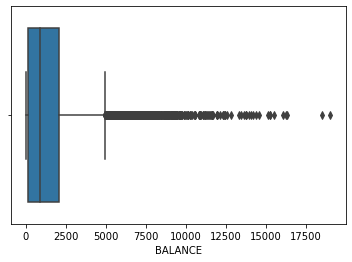

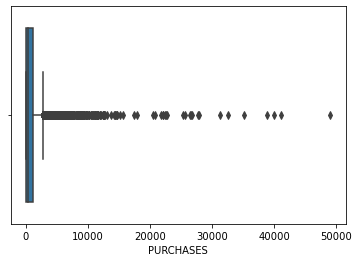

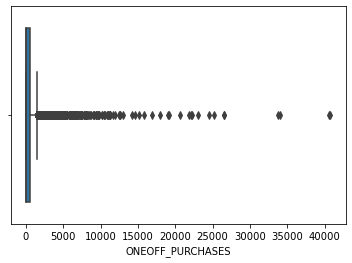

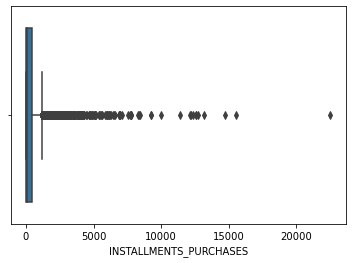

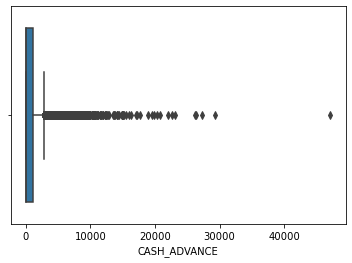

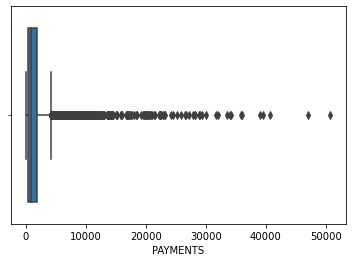

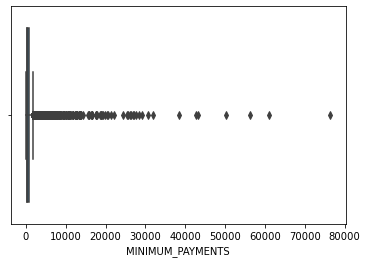

In [57]:
features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
            'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS']
for i in features:
    sns.boxplot(data=df, x=df[i])
    plt.show()

In [53]:
balance = df['BALANCE'].quantile(0.95)
purchases = df['PURCHASES'].quantile(0.95)
oneoff_purchases = df['ONEOFF_PURCHASES'].quantile(0.95)
installments_purchases = df['INSTALLMENTS_PURCHASES'].quantile(0.95)
cash_advance = df['CASH_ADVANCE'].quantile(0.95)
cash_advance_trx = df['CASH_ADVANCE_TRX'].quantile(0.95)
payments = df['PAYMENTS'].quantile(0.95)
minimum_payments = df['MINIMUM_PAYMENTS'].quantile(0.95)

In [54]:
df_limpo = df.loc[df['BALANCE'] <= balance]
df_limpo = df_limpo.loc[df_limpo['PURCHASES'] <= purchases]
df_limpo = df_limpo.loc[df_limpo['ONEOFF_PURCHASES'] <= oneoff_purchases]
df_limpo = df_limpo.loc[df_limpo['INSTALLMENTS_PURCHASES'] <= installments_purchases]
df_limpo = df_limpo.loc[df_limpo['CASH_ADVANCE'] <= cash_advance]
df_limpo = df_limpo.loc[df_limpo['CASH_ADVANCE_TRX'] <= cash_advance_trx]
df_limpo = df_limpo.loc[df_limpo['PAYMENTS'] <= payments]
df_limpo = df_limpo.loc[df_limpo['MINIMUM_PAYMENTS'] <= minimum_payments]

In [55]:
df_limpo.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  6738.000000        6738.000000  6738.000000       6738.000000   
mean   1043.884008           0.878677   587.007857        327.503583   
std    1223.839637           0.221774   715.249349        547.826165   
min       0.000000           0.000000     0.000000          0.000000   
1%        1.895760           0.181818     0.000000          0.000000   
5%       10.029662           0.363636     0.000000          0.000000   
10%      21.968181           0.500000     0.000000          0.000000   
25%      87.892641           0.857143    45.650000          0.000000   
50%     634.301414           1.000000   324.085000          0.010000   
75%    1522.793649           1.000000   857.130000        445.687500   
90%    2740.268113           1.000000  1607.852000       1135.137000   
95%    3741.233091           1.000000  2154.707500       1601.096500   
99%    5324.512623           1.000000  3057.975200       2371.796000   
max    5906.184924           1.000000  3937.590000       2655.990000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             6738.000000   6738.000000          6738.000000   
mean               259.793482    512.948224             0.475954   
std                373.627424    916.770431             0.392394   
min                  0.000000      0.000000             0.000000   
1%                   0.000000      0.000000             0.000000   
5%                   0.000000      0.000000             0.000000   
10%                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 80.000000      0.000000             0.416667   
75%                396.937500    689.572762             0.916667   
90%                810.033000   1830.890194             1.000000   
95%               1112.452500   2684.742928             1.000000   
99%               1574.116800   4044.016033             1.000000   
max               1746.430000   4639.195255             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 6738.000000                       6738.000000   
mean                     0.177435                          0.348286   
std                      0.274525                          0.386485   
min                      0.000000                          0.000000   
1%                       0.000000                          0.000000   
5%                       0.000000                          0.000000   
10%                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.250000                          0.750000   
90%                      0.583333                          1.000000   
95%                      0.916667                          1.000000   
99%                      1.000000                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             6738.000000       6738.000000    6738.000000   6737.000000   
mean                 0.103413          1.906649      10.832146   3708.464240   
std                  0.156016          3.119753      14.538220   2954.382446   
min                  0.000000          0.000000       0.000000    150.000000   
1%                   0.000000          0.000000       0.000000    500.000000   
5%                   0.000000          0.000000       0.000000   1000.000000   
10%                  0.000000          0.000000       0.000000   1000.000000   
25%                  0.000000          0.000000       1.000000   1500.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.166667          3.00

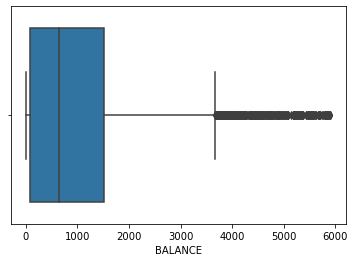

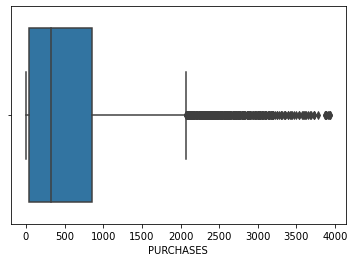

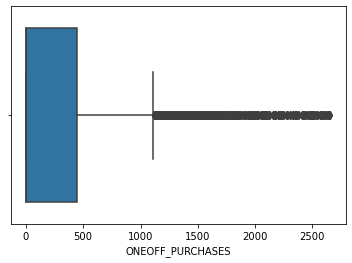

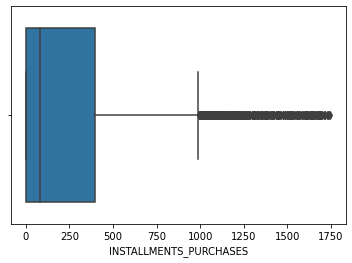

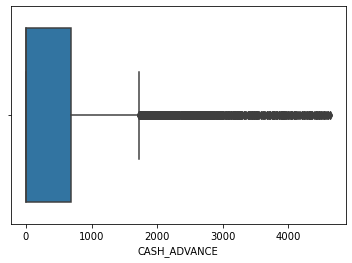

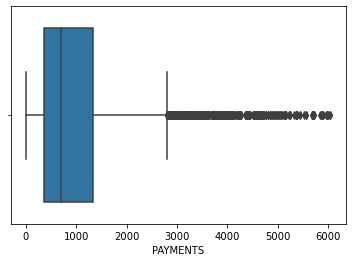

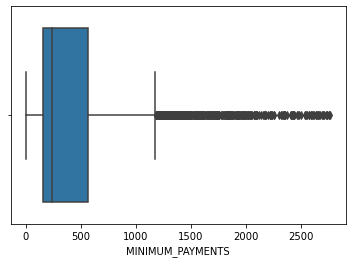

In [56]:
features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
            'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS']
for i in features:
    sns.boxplot(data=df_limpo, x=df_limpo[i])
    plt.show()

Após a remoção dos outliers após o percentile 0.95 ainda teve resquísios de outliers, mas em menor quantidade em comparação aos dados originais. Afim de não diminuir muito o volume de dados para a criação do modelo, será mantido apenas com esta única etapa de remoção de outliers.

# Tratamento de nulos

In [58]:
df_limpo.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [59]:
df_limpo.shape

(6738, 18)

In [60]:
df_limpo.dropna(inplace=True)

In [63]:
df_limpo.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Como foi observado apenas um valor nulo após a remoção dos outliers, foi então dropado esta única ocorrência.

# Remoção de features não importantes

In [65]:
df_limpo.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
7  C10008  1823.652743           1.000000     436.20              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40           0.0             0.166667   
2                    0.00           0.0             1.000000   
4                    0.00           0.0             0.083333   
5                 1333.28           0.0             0.666667   
7                  436.20           0.0             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
7                    0.000000                          1.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1000.0   
2                     0.0                 0             12        7500.0   
4                     0.0                 0              1        1200.0   
5                     0.0                 0              8        1800.0   
7                     0.0                 0             12        2300.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787               0.0      12  
2   622.066742        627.284787               0.0      12  
4   678.334763        244.791237               0.0      12  
5  1400.057770       2407.246035               0.0      12  
7   679.065082        532.033990               0.0      12

In [66]:
df_limpo.drop('CUST_ID', axis=1, inplace=True)

A única remoção nesta etapa foi da coluna "CUST_ID", que representa apenas o identificador do cliente.

# EDA

In [67]:
df_limpo.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   
7  1823.652743           1.000000     436.20              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40           0.0             0.166667   
2                    0.00           0.0             1.000000   
4                    0.00           0.0             0.083333   
5                 1333.28           0.0             0.666667   
7                  436.20           0.0             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
7                    0.000000                          1.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1000.0   
2                     0.0                 0             12        7500.0   
4                     0.0                 0              1        1200.0   
5                     0.0                 0              8        1800.0   
7                     0.0                 0             12        2300.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787               0.0      12  
2   622.066742        627.284787               0.0      12  
4   678.334763        244.791237               0.0      12  
5  1400.057770       2407.246035               0.0      12  
7   679.065082        532.033990               0.0      12

## Credit limit - Target

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


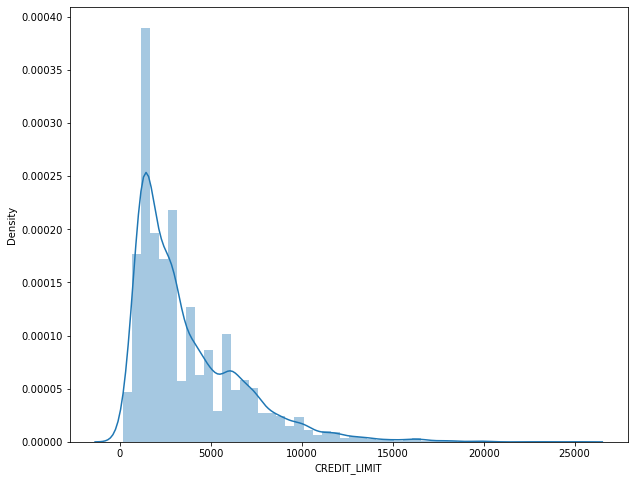

In [73]:
plt.figure(figsize=(10, 8))
sns.distplot(df_limpo['CREDIT_LIMIT'])
plt.show()

O target do projeto se dá pela coluna "CREDIT_LIMIT". Observando os dados, é possível perceber que existe uma variação muito grande, com clientes com o crédito bem próximo a 0 e indo até mais de 25 mil. A grande parte dos clientes ficam entre 0 e 5000 mil de crédito, após este valor, ocorre um leve agrupamento entre 6000 e 7000.

## Variáveis contínuas

Foi realizado na etapa de remoção dos outliers, através do gráfico de boxplot, para ter ideia da existência dos valores de outliers.  

Posteriormente será realizada separando pelos grupos gerados pelo modelo não supervisionado

# Variáveis categóricas

In [74]:
df_limpo.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [81]:
variaveis = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
             'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


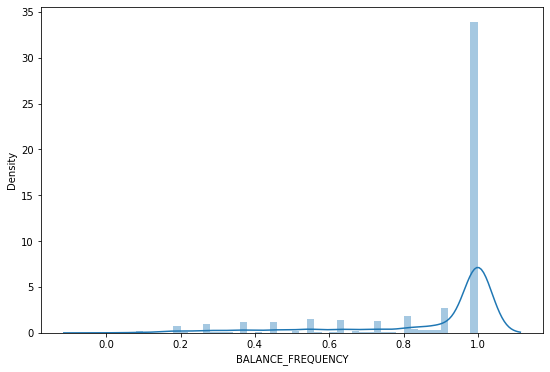

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


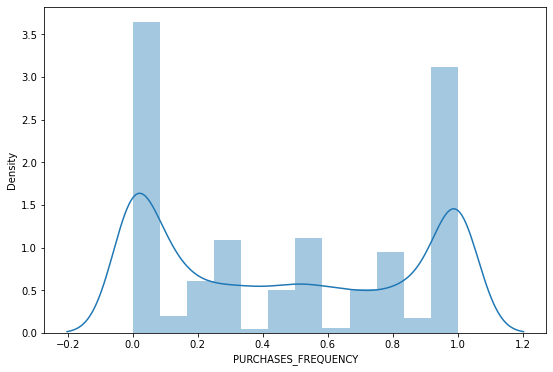

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


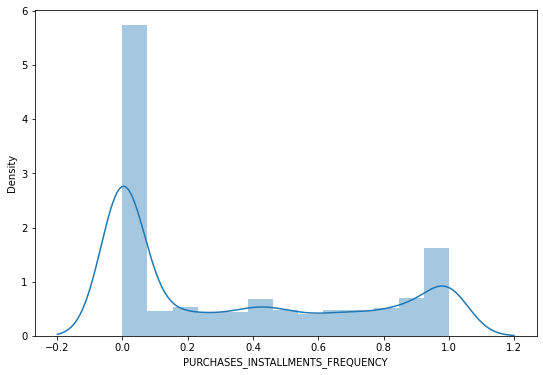

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


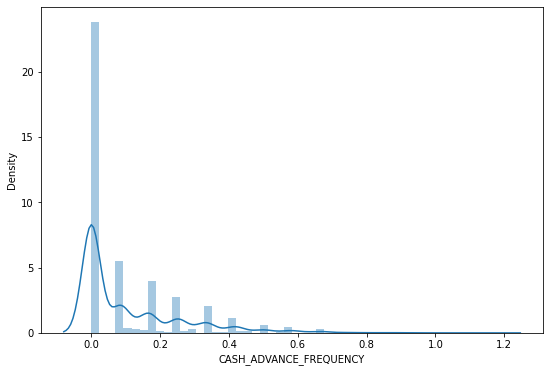

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


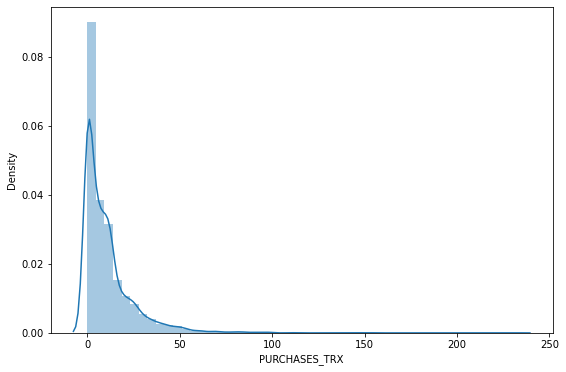

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


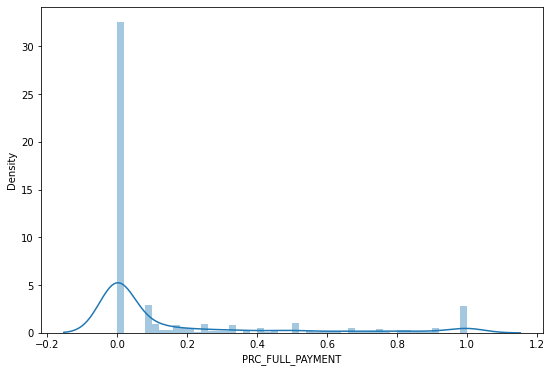

In [84]:
for i in variaveis:
    plt.figure(figsize=(9, 6))
    sns.distplot(x=df_limpo[i])
    plt.xlabel(i)
    plt.show()

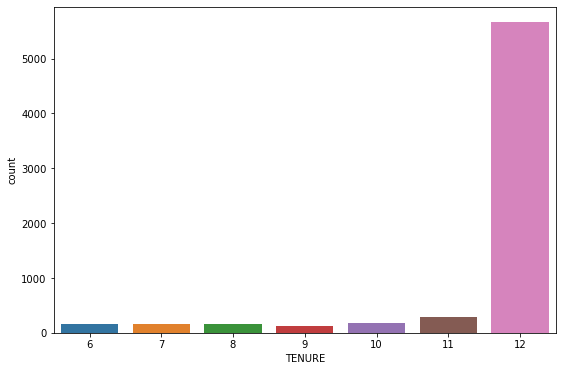

In [85]:
plt.figure(figsize=(9,6))
sns.countplot(data=df_limpo, x=df_limpo['TENURE'])
plt.show()

Para as features que não valores muito elevados e dispersos, foi realizado o distplot e também o countplot. Pelo distplot foi possível observar uma concentração muito elevada de clientes com um baixo número de compras, assim como um grande número de clientes que são ativos. Também foi possível observar que grande parte dos clientes são antigos, com o Tenure de 12 (provavelmente 12 meses ou mais). 

<Figure size 1440x1440 with 0 Axes>

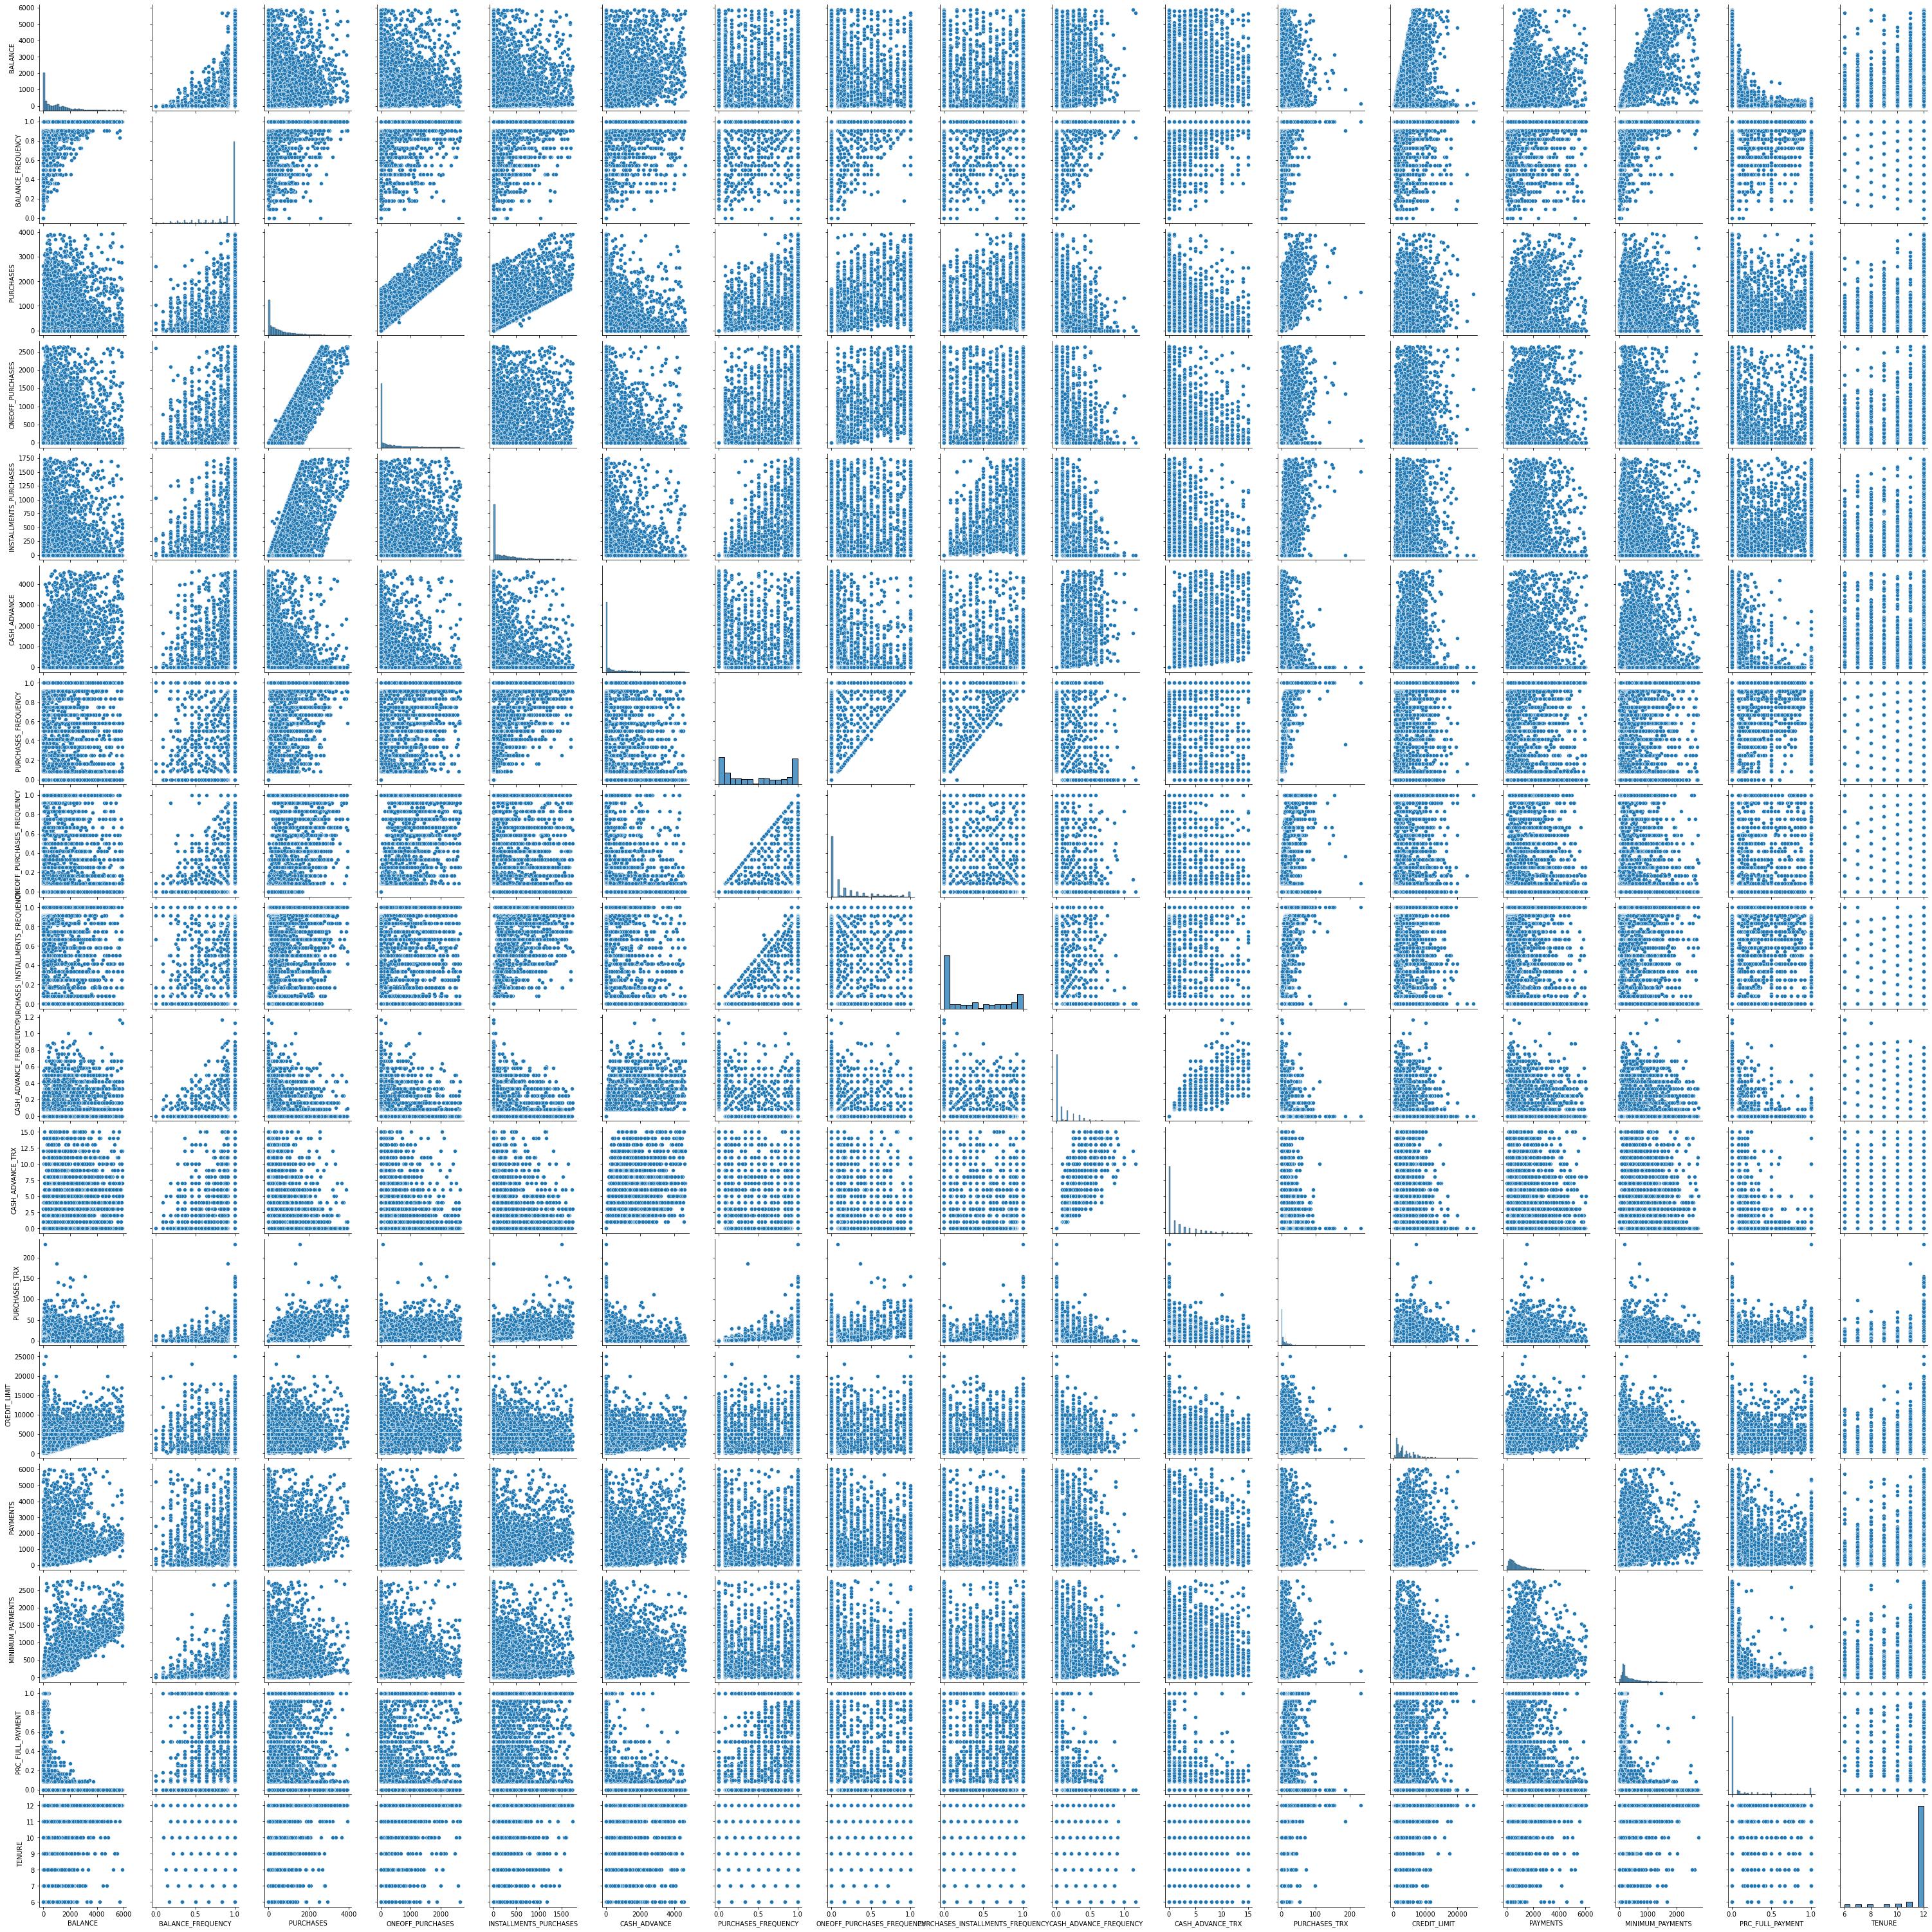

In [87]:
plt.figure(figsize=(20,20))
sns.pairplot(df_limpo)
plt.show()

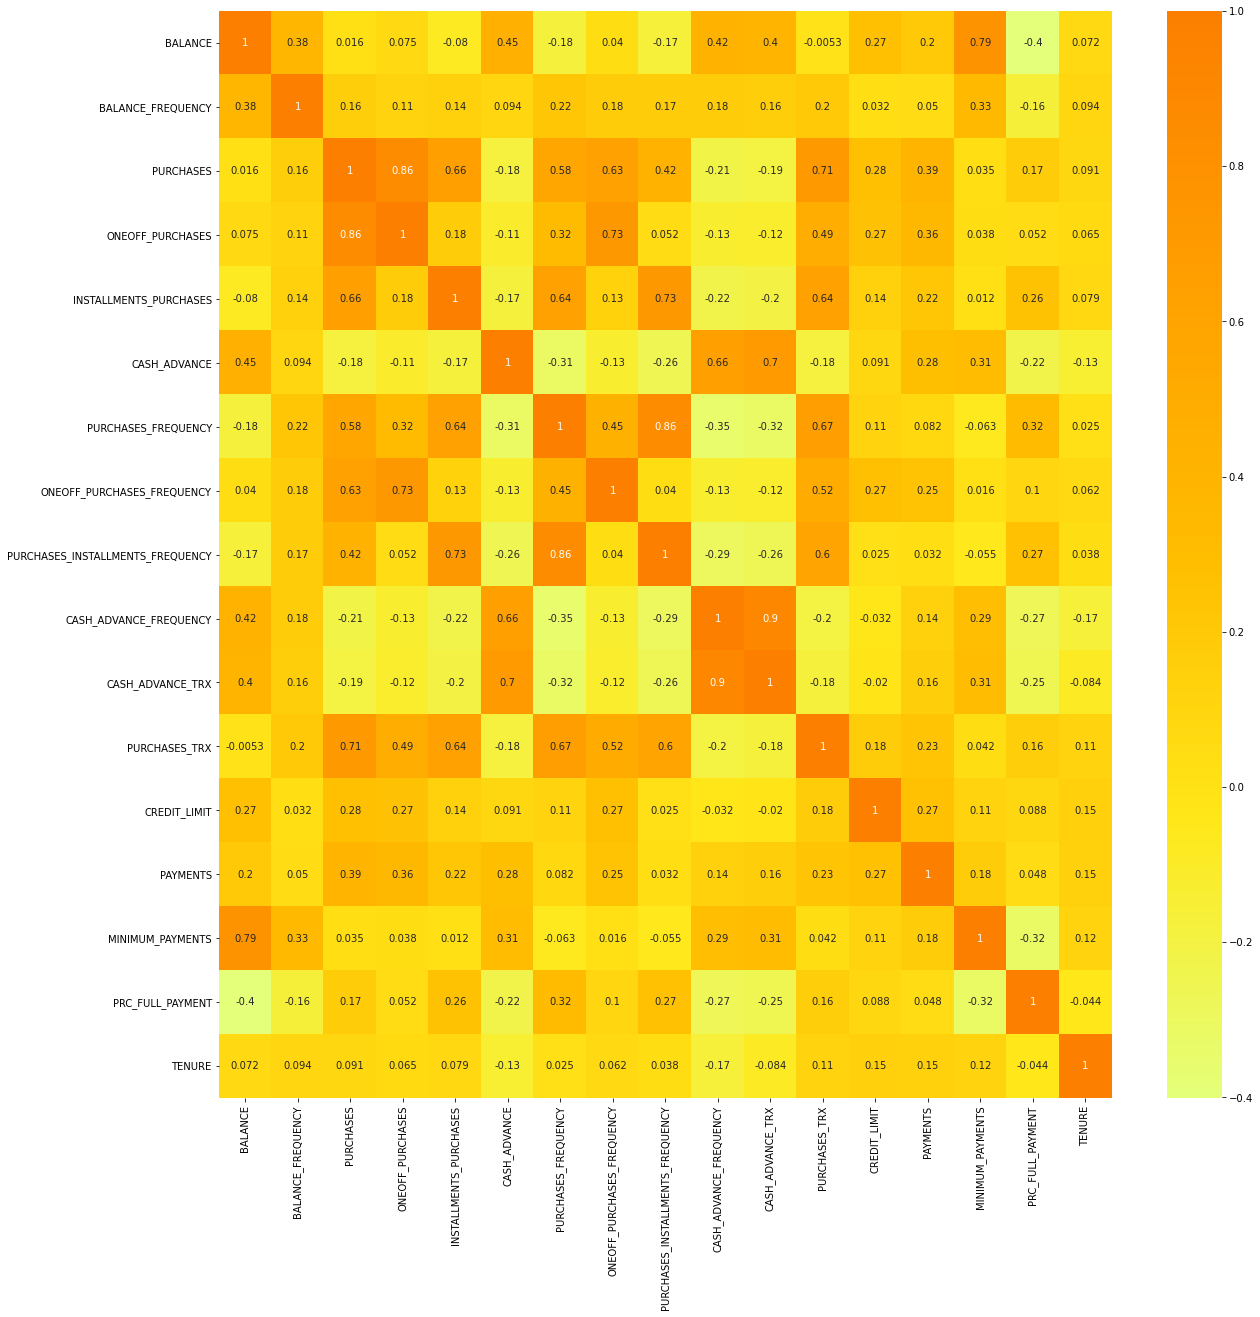

In [88]:
plt.figure(figsize=(20,20))
sns.heatmap(df_limpo.corr(), annot=True, cmap='Wistia')
plt.show()

Foi realizado o pairplot e o gráfico de correlação entre as variáveis, onde foi possível observar que a feature "CASH_ADVANCE_TRX" E "CASH_ADVANCE_FREQUENCY" possuem uma forte correlação, o que já era esperado, uma vez que quanto mais frequênte o pagamento esta sendo feito, mais pagamentos estão sendo feitos. A princípio as duas features serão mantidas, dependendo do desempenho do modelo será proposta outra alternativa.

# Modelo não supervisionado

Será construído um modelo não supervisionado para identificar grupos de clientes. Com os grupos gerados, será realizada a análise exploratória para entender um pouco melhor cada um dos grupos.

In [90]:
df_limpo.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [96]:
FEATURES = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
            'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
            'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
            'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

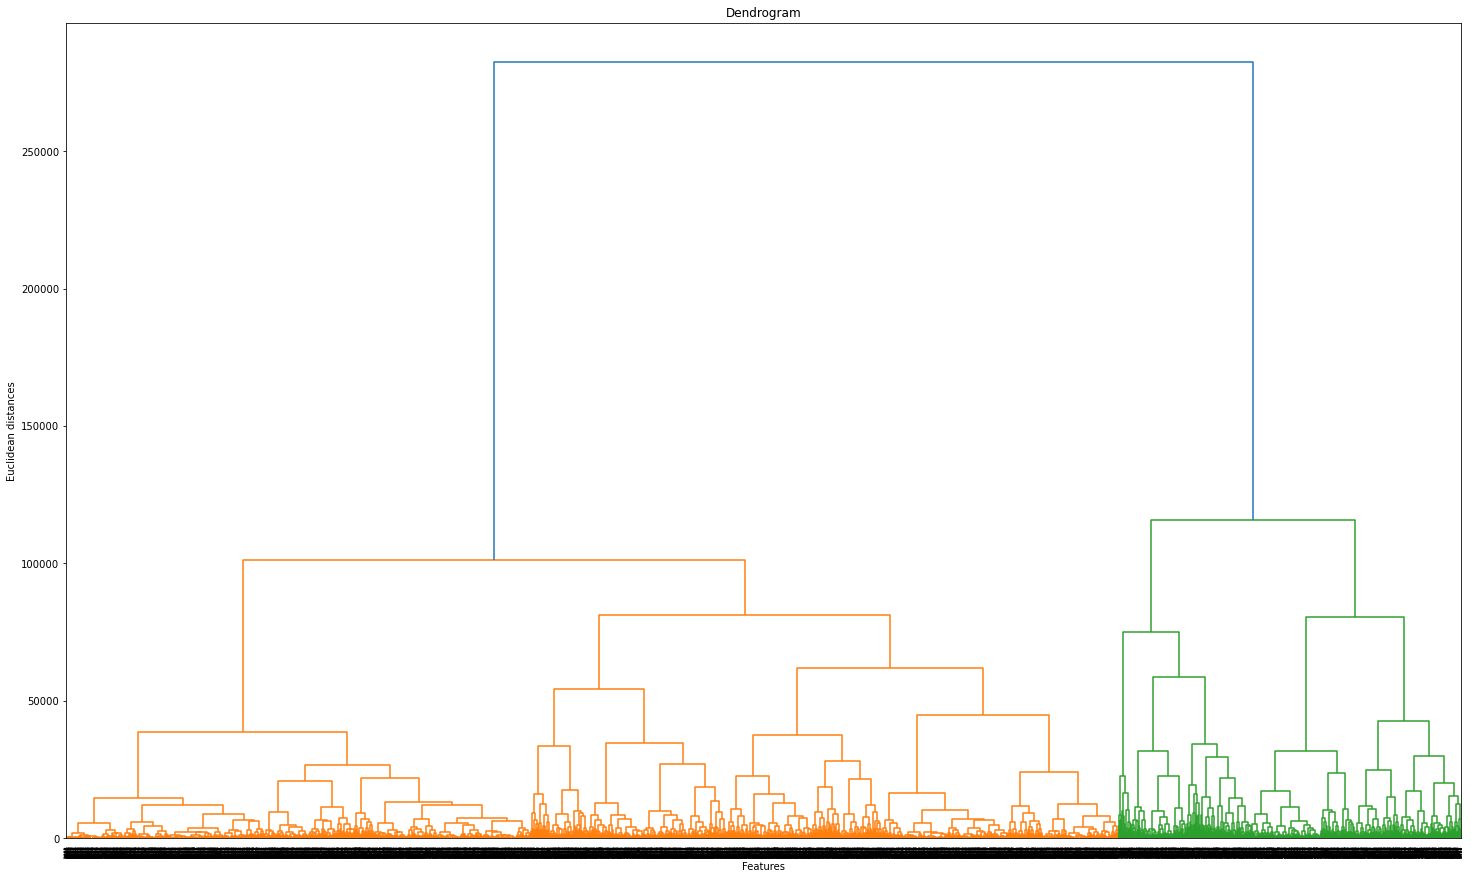

In [97]:
plt.figure(figsize=(25,15))
dendrogram = sch.dendrogram(sch.linkage(df_limpo[FEATURES], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Features') 
plt.ylabel('Euclidean distances')
plt.show()

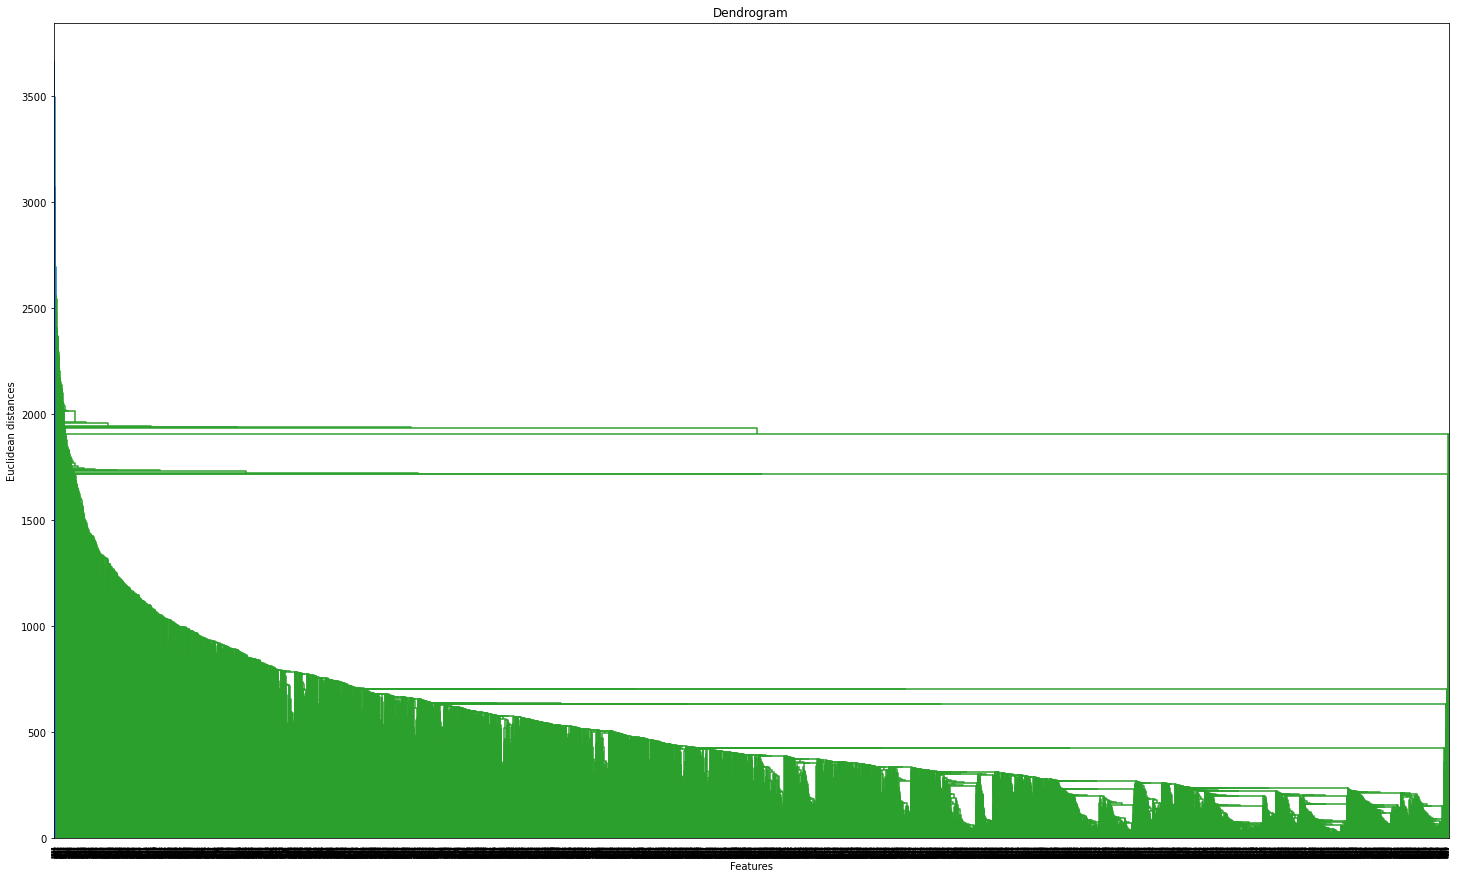

In [98]:
plt.figure(figsize=(25,15))
dendrogram = sch.dendrogram(sch.linkage(df_limpo[FEATURES], method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Features') 
plt.ylabel('Euclidean distances')
plt.show()

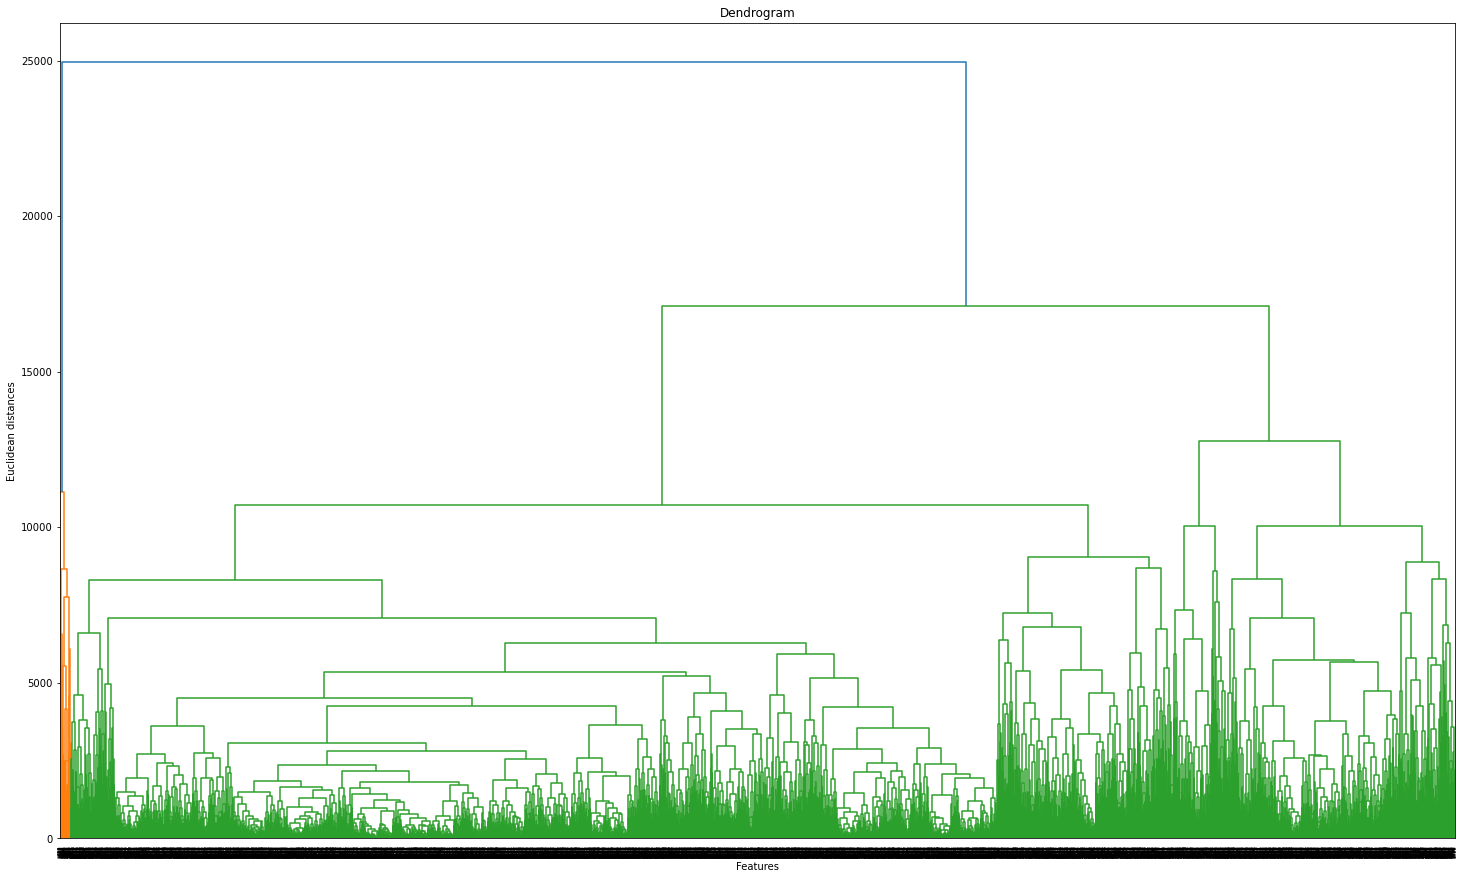

In [99]:
plt.figure(figsize=(25,15))
dendrogram = sch.dendrogram(sch.linkage(df_limpo[FEATURES], method = 'complete'))
plt.title('Dendrogram')
plt.xlabel('Features') 
plt.ylabel('Euclidean distances')
plt.show()

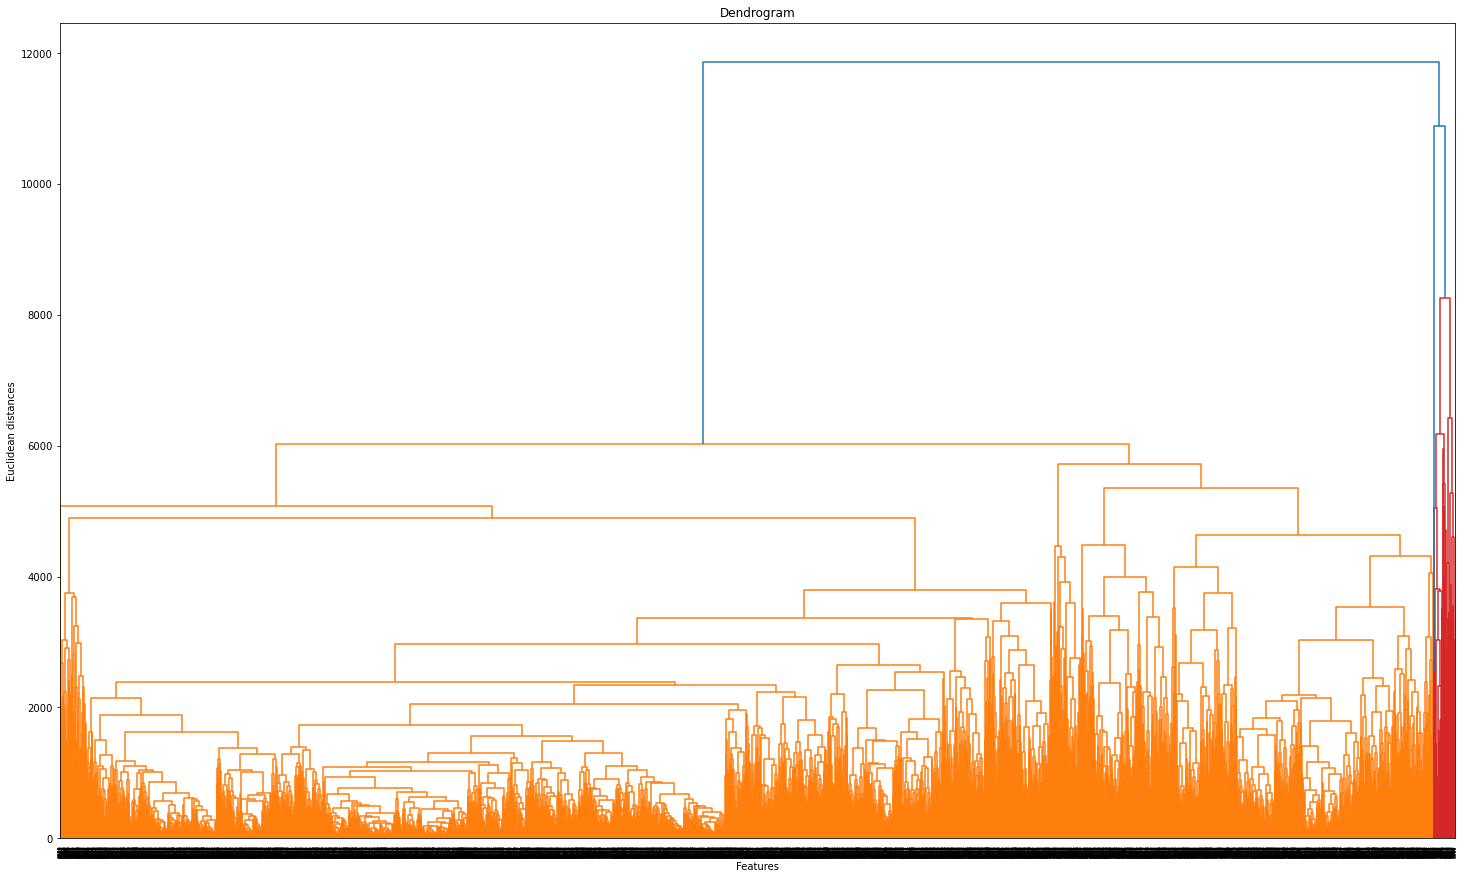

In [100]:
plt.figure(figsize=(25,15))
dendrogram = sch.dendrogram(sch.linkage(df_limpo[FEATURES], method = 'average'))
plt.title('Dendrogram')
plt.xlabel('Features') 
plt.ylabel('Euclidean distances')
plt.show()

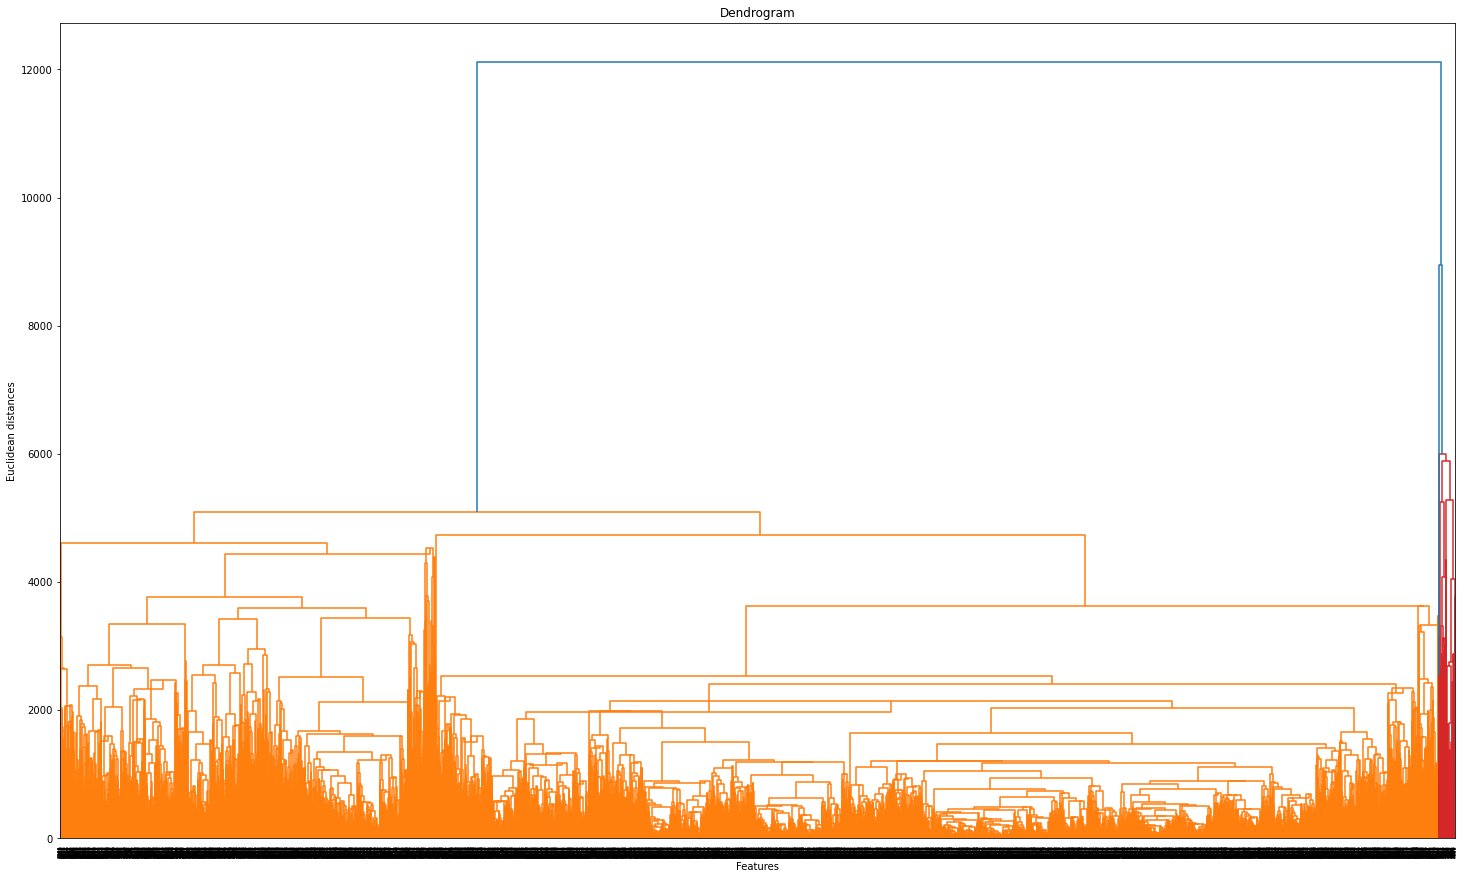

In [101]:
plt.figure(figsize=(25,15))
dendrogram = sch.dendrogram(sch.linkage(df_limpo[FEATURES], method = 'centroid'))
plt.title('Dendrogram')
plt.xlabel('Features') 
plt.ylabel('Euclidean distances')
plt.show()

Foi construído dendogramas utilizando diferentes metodologias, sendo que apenas pelo método "ward" que se teve um resultado satisfatório. Por ele, é possível observar claramente dois grupos bem distintos, mas com uma separação ainda melhor em 4 grupos diferentes, o que será explorado para os modelos a serem testados.  

Serão testados os modelos por KMeans e também por Gaussian Mixture.

## KMeans  

Primeiramente é necessário identificar o número de clusters ideais. Apesar do dendograma dar a ideia de quatro clusters separados, é necessário verificar pelo método de cotovelo e por silhueta.

No handles with labels found to put in legend.


<Figure size 864x648 with 0 Axes>

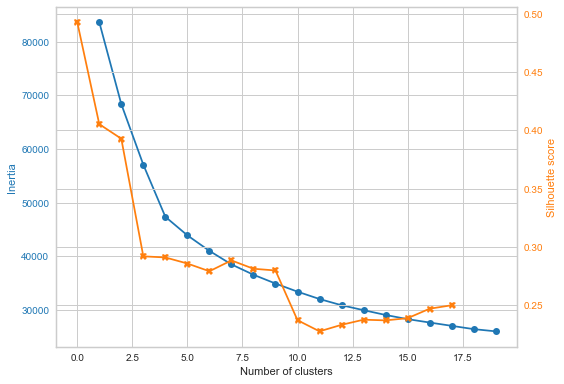

In [179]:
SSE = []
SILHUETA = []

for cluster in range(2, 20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_limpo[FEATURES])
    SSE.append(kmeans.inertia_)
    silhueta = silhouette_score(df_limpo[FEATURES], kmeans.labels_, 
                                metric='euclidean', random_state=42)
    SILHUETA.append(silhueta)

    
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(frame['Cluster'], frame['SSE'], marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Silhouette score', color=color) 
ax2.plot(SILHUETA, marker='X', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.legend()
plt.show()

Observando os dados de silhueta e de cotovelo, estive muito em dúvida entre 3 e 4 clusters. Mas, observando o dendograma e também a curva do cotovelo, foi escolhida a utilização de quatro clusters.

In [134]:
km = KMeans(4)
df_limpo['cluster_kmeans'] = km.fit_predict(df_limpo[FEATURES])
df_limpo['cluster_kmeans'].value_counts()

0    4020
2    1439
3     781
1     497
Name: cluster_kmeans, dtype: int64

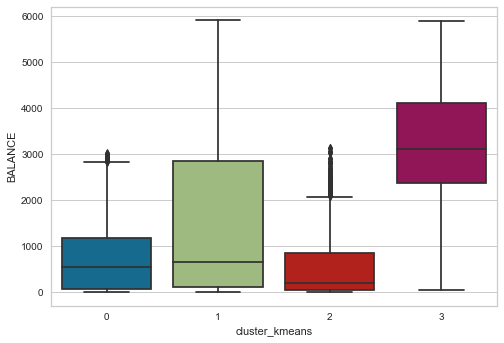

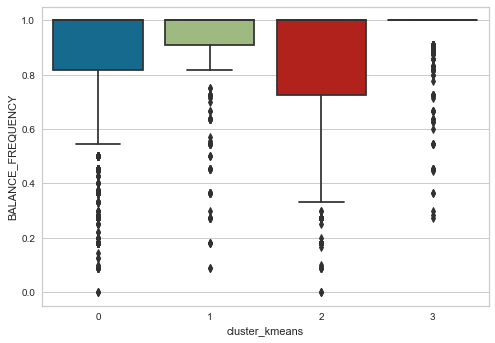

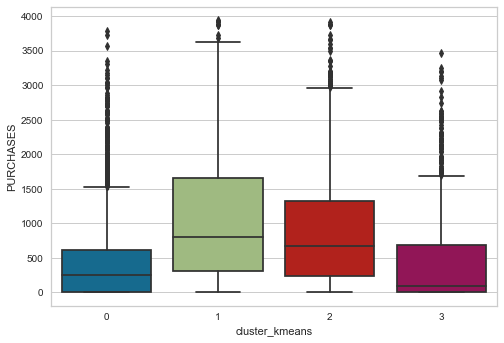

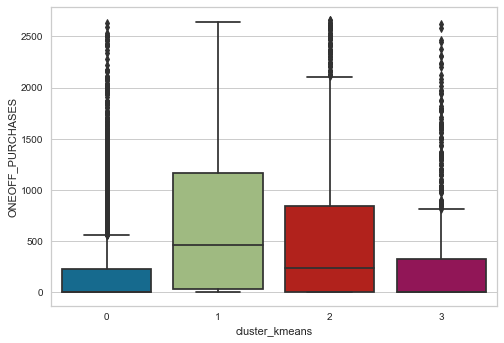

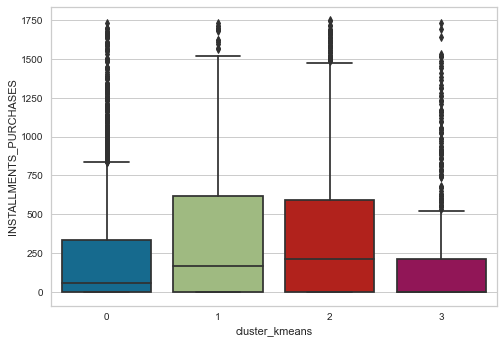

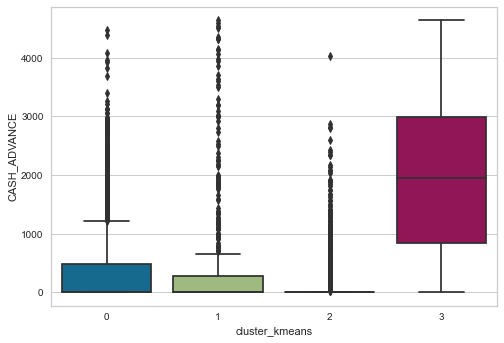

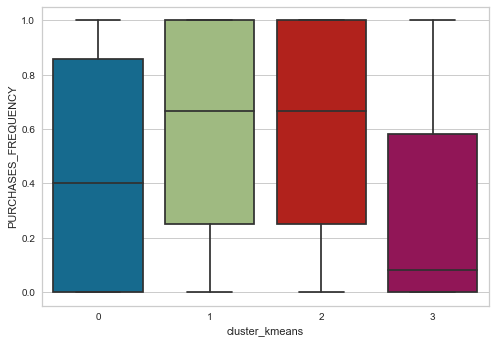

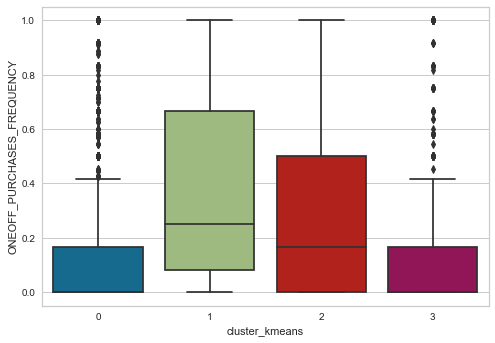

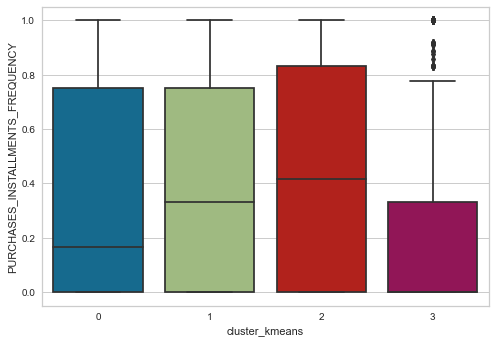

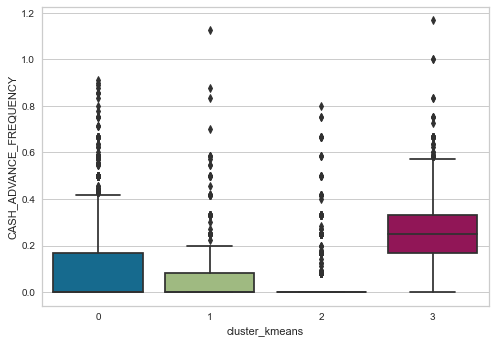

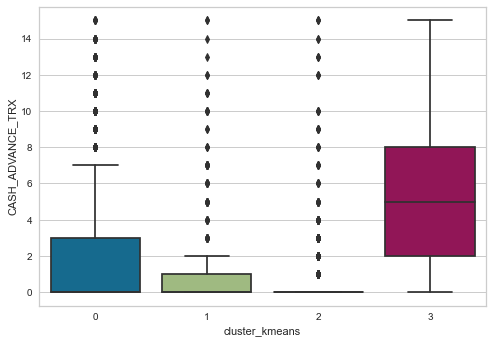

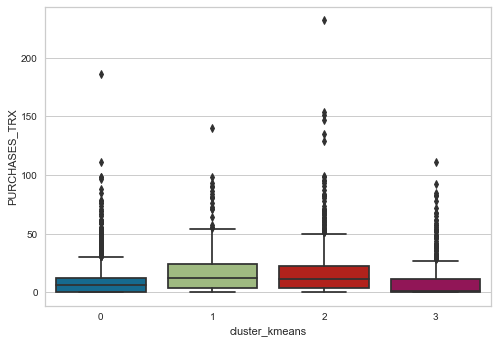

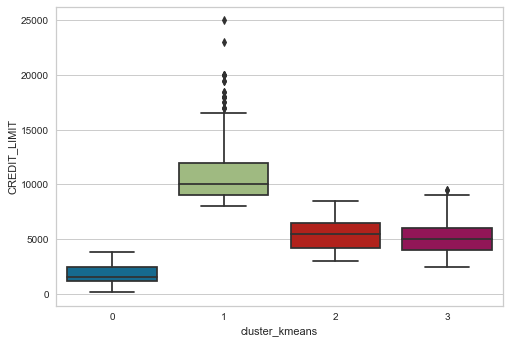

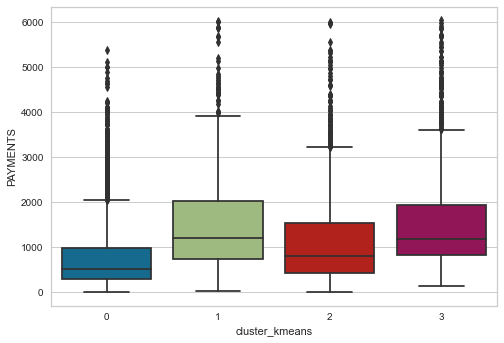

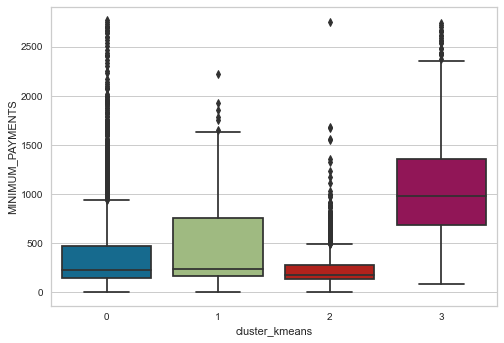

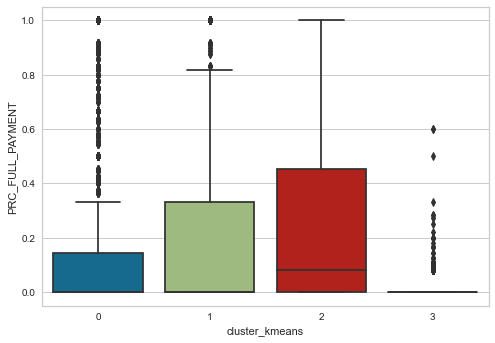

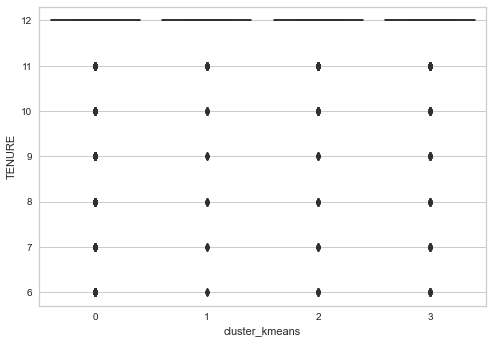

In [135]:
for i in FEATURES:
    sns.boxplot(x='cluster_kmeans', y=i, data=df_limpo)
    plt.show()

Observando as features separados por grupo, não foi possível identificar uma separação muito clara entre os grupos. Com isso, foi realizada a clusterização por Gaussian Mixture, afim de obter os grupos por outro modelo.

## Gaussian Mixture

Text(0.5, 0, 'n_components')

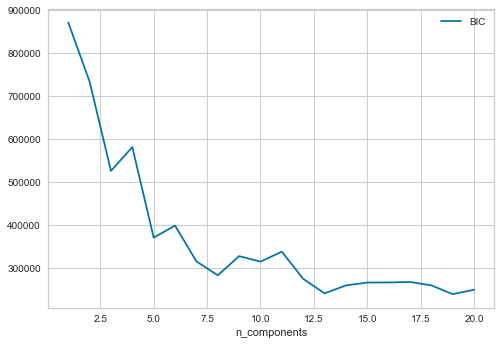

In [128]:
n_components = np.arange(1,21)
models = [GaussianMixture(n, covariance_type='full', 
                         random_state=42).fit(df_limpo[FEATURES])
          for n in n_components]

plt.plot(n_components, [m.bic(df_limpo[FEATURES]) for m in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [160]:
gmm = GaussianMixture(4).fit(df_limpo[FEATURES])
labels_gaussian_mixture = gmm.predict(df_limpo[FEATURES])
df_limpo['cluster_gmm'] = labels_gaussian_mixture.astype('str')
df_limpo['cluster_gmm'].value_counts()

0    2172
1    1666
3    1457
2    1442
Name: cluster_gmm, dtype: int64

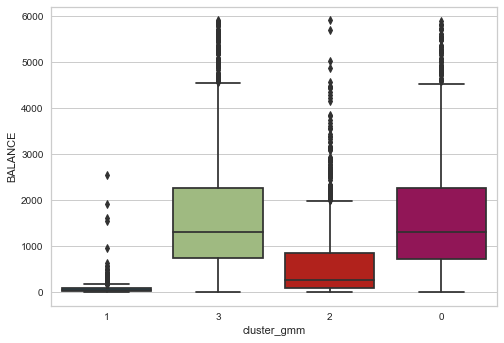

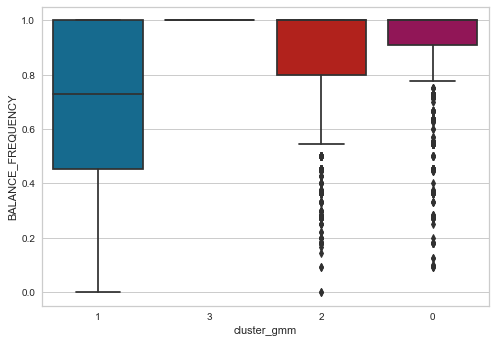

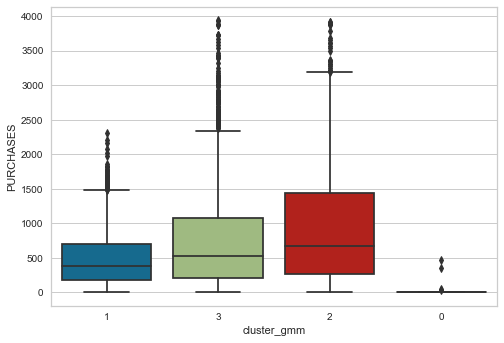

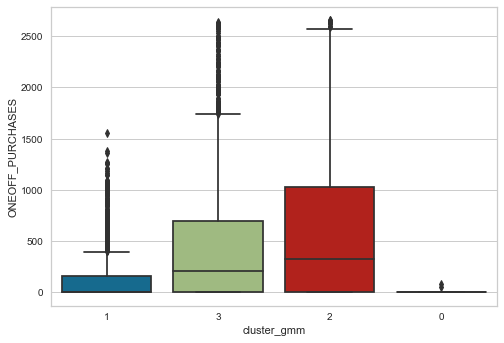

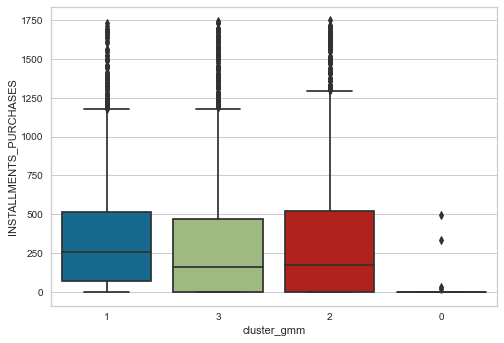

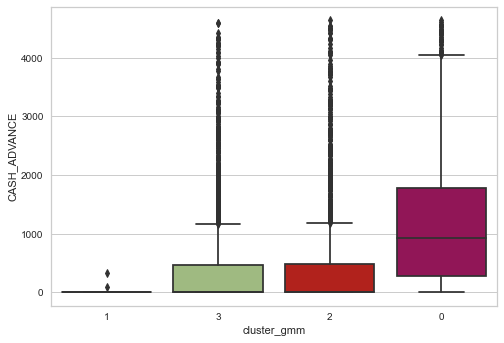

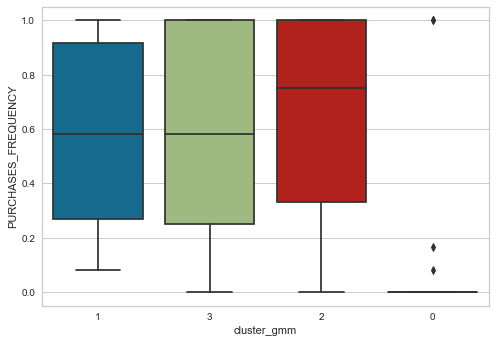

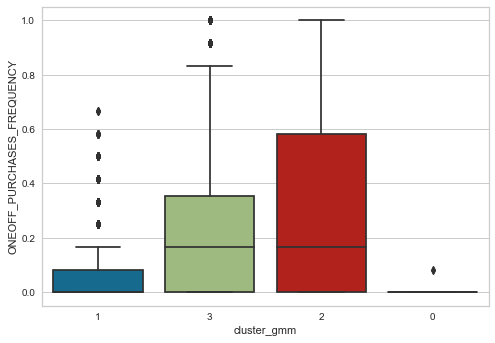

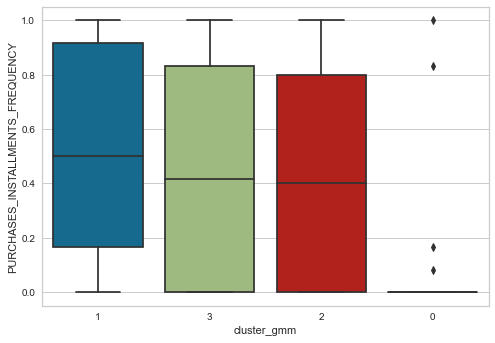

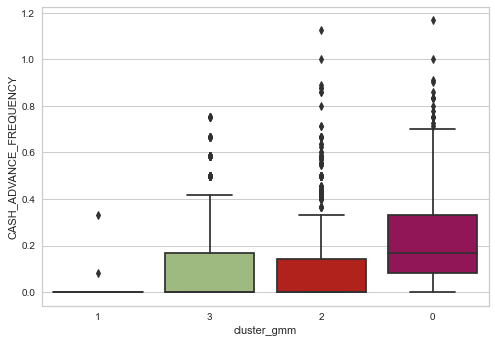

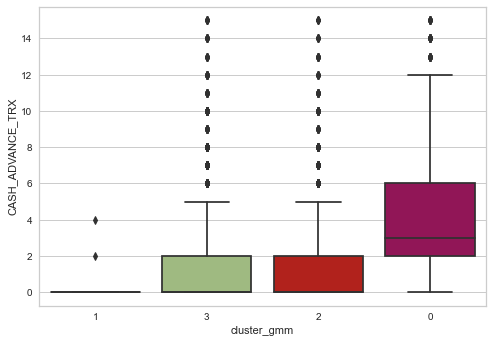

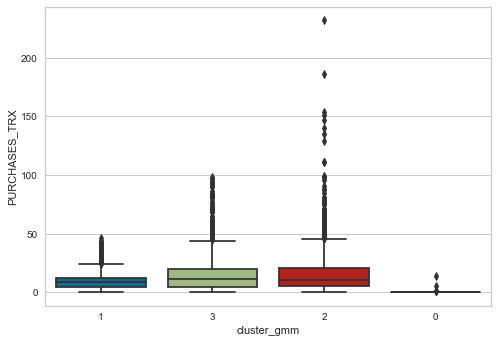

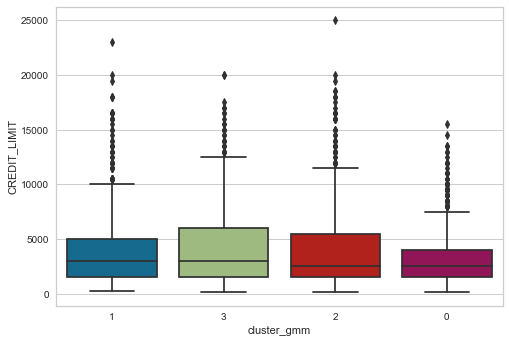

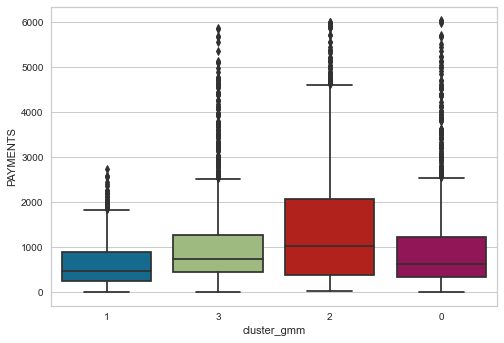

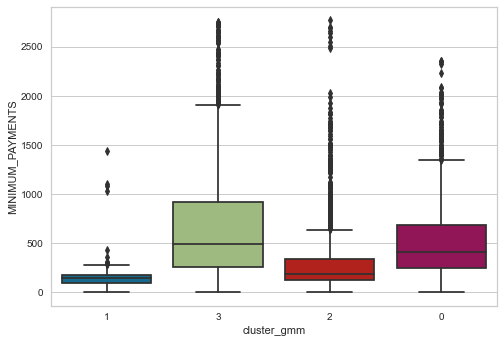

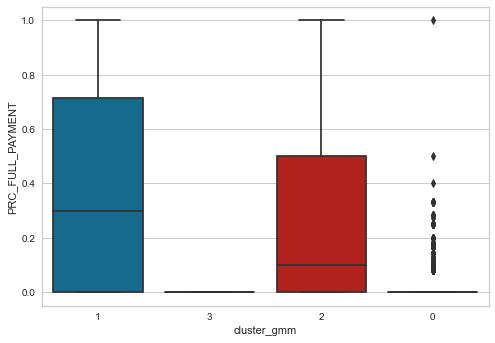

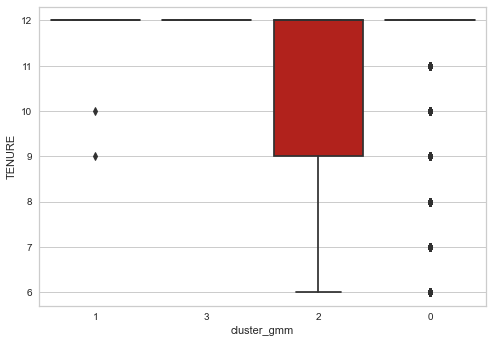

In [133]:
for i in FEATURES:
    sns.boxplot(x='cluster_gmm', y=i, data=df_limpo)
    plt.show()

Mantendo os quatro clusters, ainda não foi possível obter insights tão significativos e conclusivos entre os grupos formados. Como tentativa a contornar este problema, será realizada a normalização dos dados. Com os valores tendo uma variação muito grande, isto pode estar atrapalhando a visualização dos grupos formados. Porém, o valor de "CREDIT_LIMIT" será mantido em sua escala original, para que seja visualizada a diferença da normalização na etapa de criação do modelo de regressão.

# Modelo não supervisionado em dados normalizados

In [175]:
df_norm = df_limpo.copy(deep=True)

In [176]:
df_norm.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  6737.000000        6737.000000  6737.000000       6737.000000   
mean   1044.036224           0.878783   587.094989        327.552195   
std    1223.866688           0.221621   715.266675        547.852293   
min       0.000000           0.000000     0.000000          0.000000   
25%      87.908147           0.857143    45.650000          0.000000   
50%     634.514354           1.000000   324.170000          0.010000   
75%    1522.831212           1.000000   857.360000        445.850000   
max    5906.184924           1.000000  3937.590000       2655.990000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             6737.000000   6737.000000          6737.000000   
mean               259.832044    512.996627             0.476025   
std                373.641746    916.829868             0.392380   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 80.000000      0.000000             0.416667   
75%                397.250000    689.701740             0.916667   
max               1746.430000   4639.195255             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 6737.000000                       6737.000000   
mean                     0.177462                          0.348338   
std                      0.274537                          0.386490   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.250000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             6737.000000       6737.000000    6737.000000   6737.000000   
mean                 0.103403          1.906783      10.833754   3708.464240   
std                  0.156026          3.119965      14.538700   2954.382446   
min                  0.000000          0.000000       0.000000    150.000000   
25%                  0.000000          0.000000       1.000000   1500.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.166667          3.000000      14.000000   5000.000000   
max                  1.166667         15.000000     232.000000  25000.000000   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  \
count  6737.000000       6737.000000       6737.000000  6737.000000   
mean   1015.121280        433.195471          0.160092    11.493098   
std     980.840155        447.898281          0.295843     1.369194   
min       0.049513          0.019163          0.000000     6.000000   
25%     351.850485        156.291747          0.000000    12.000000   
50%     687.609976        237.748097          0.000000    12.000000   
75%    1331.305380        564.715406          0.166667    12.000000   
max    6043.227704       2766.440973          1.000000    12.000000   

       cluster_kmeans  
count     6737.000000  
mean         0.848746  
std          1.118623  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          2.000000  
max          3.000000

In [177]:
scaler = StandardScaler()
variaveis_scalling = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
                      'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS',
                      'MINIMUM_PAYMENTS']
df_norm[variaveis_scalling] = scaler.fit_transform(df_norm[variaveis_scalling])

In [178]:
df_norm.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count  6.737000e+03        6737.000000  6.737000e+03      6.737000e+03   
mean  -1.142852e-16           0.878783  2.074273e-15     -9.854074e-16   
std    1.000074e+00           0.221621  1.000074e+00      1.000074e+00   
min   -8.531270e-01           0.000000 -8.208667e-01     -5.979285e-01   
25%   -7.812935e-01           0.857143 -7.570396e-01     -5.979285e-01   
50%   -3.346380e-01           1.000000 -3.676174e-01     -5.979103e-01   
75%    3.912440e-01           1.000000  3.778801e-01      2.159461e-01   
max    3.973071e+00           1.000000  4.684608e+00      4.250435e+00   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count            6.737000e+03  6.737000e+03          6737.000000   
mean             5.349241e-16  1.009937e-15             0.476025   
std              1.000074e+00  1.000074e+00             0.392380   
min             -6.954558e-01 -5.595746e-01             0.000000   
25%             -6.954558e-01 -5.595746e-01             0.083333   
50%             -4.813311e-01 -5.595746e-01             0.416667   
75%              3.678073e-01  1.927492e-01             0.916667   
max              3.978967e+00  4.500840e+00             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 6737.000000                       6737.000000   
mean                     0.177462                          0.348338   
std                      0.274537                          0.386490   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.250000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             6737.000000      6.737000e+03   6.737000e+03   6737.000000   
mean                 0.103403     -8.033142e-16   1.219185e-15   3708.464240   
std                  0.156026      1.000074e+00   1.000074e+00   2954.382446   
min                  0.000000     -6.112007e-01  -7.452220e-01    150.000000   
25%                  0.000000     -6.112007e-01  -6.764349e-01   1500.000000   
50%                  0.000000     -6.112007e-01  -2.637126e-01   3000.000000   
75%                  0.166667      3.504198e-01   2.177967e-01   5000.000000   
max                  1.166667      4.196902e+00   1.521337e+01  25000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  \
count  6.737000e+03      6.737000e+03       6737.000000  6737.000000   
mean  -1.034417e-16     -2.647265e-16          0.160092    11.493098   
std    1.000074e+00      1.000074e+00          0.295843     1.369194   
min   -1.034977e+00     -9.672028e-01          0.000000     6.000000   
25%   -6.762774e-01     -6.182749e-01          0.000000    12.000000   
50%   -3.339337e-01     -4.363979e-01          0.000000    12.000000   
75%    3.223844e-01      2.936598e-01          0.166667    12.000000   
max    5.126707e+00      5.209707e+00          1.000000    12.000000   

       cluster_kmeans  
count     6737.000000  
mean         0.848746  
std          1.118623  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          2.000000  
max          3.000000

## KMeans

No handles with labels found to put in legend.


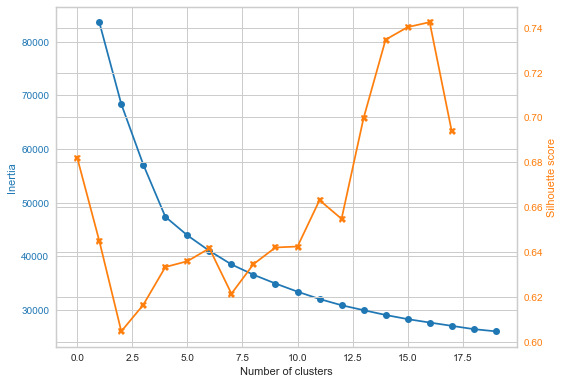

In [180]:
SSE = []
SILHUETA = []

for cluster in range(2, 20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_norm[FEATURES])
    SSE.append(kmeans.inertia_)
    silhueta = silhouette_score(df_norm[FEATURES], kmeans.labels_, 
                                metric='euclidean', random_state=42)
    SILHUETA.append(silhueta)

    
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(frame['Cluster'], frame['SSE'], marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Silhouette score', color=color) 
ax2.plot(SILHUETA, marker='X', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.legend()
plt.show()

In [148]:
km = KMeans(4)
df_norm['cluster_kmeans'] = km.fit_predict(df_norm[FEATURES])
df_norm['cluster_kmeans'].value_counts()

3    3796
1    1230
0    1138
2     573
Name: cluster_kmeans, dtype: int64

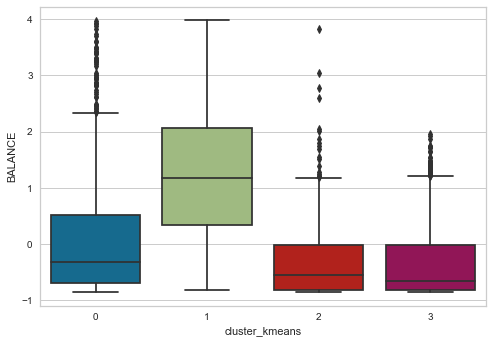

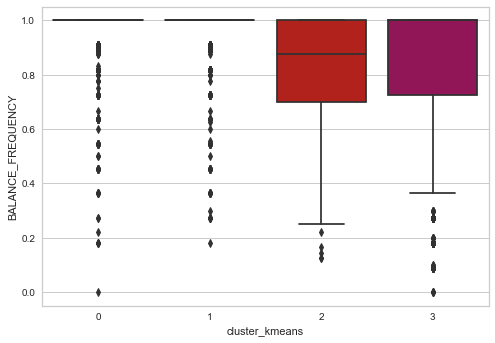

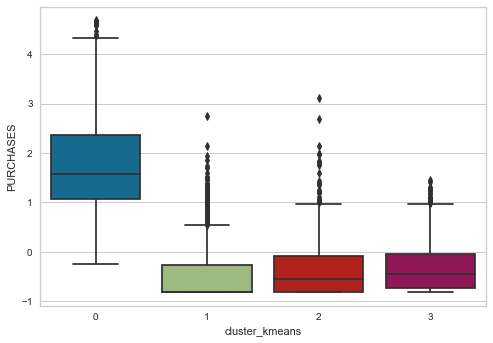

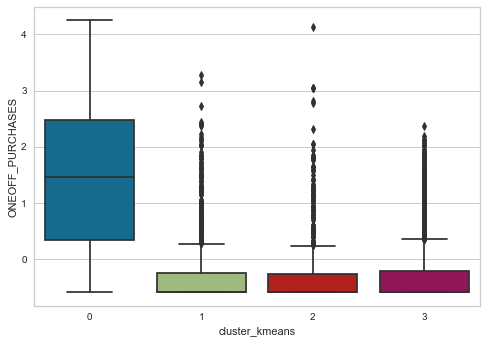

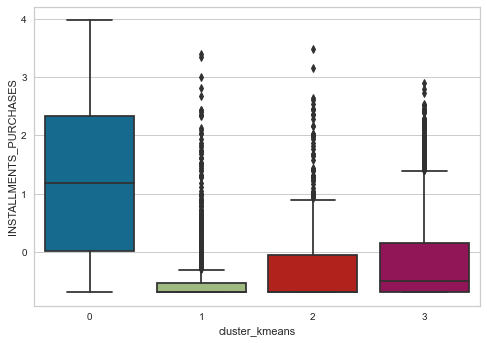

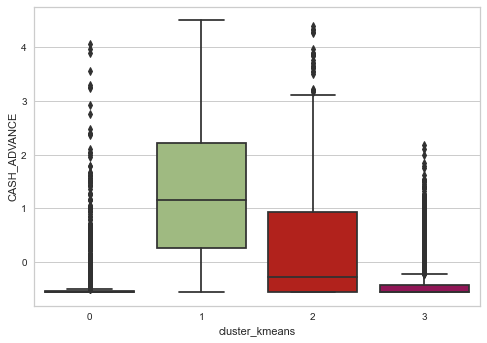

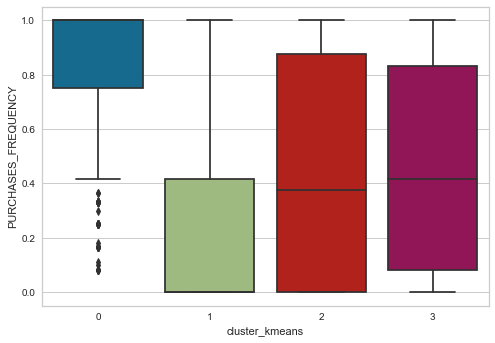

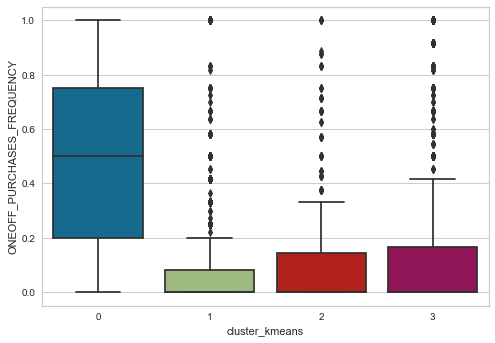

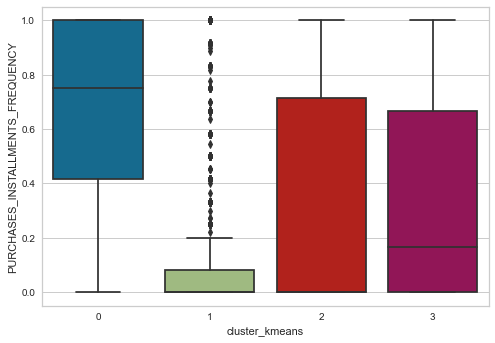

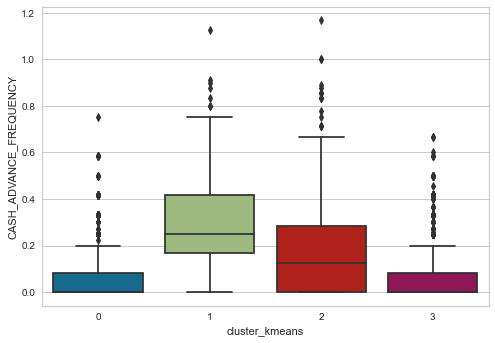

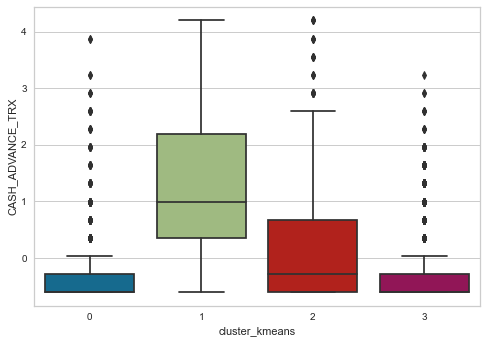

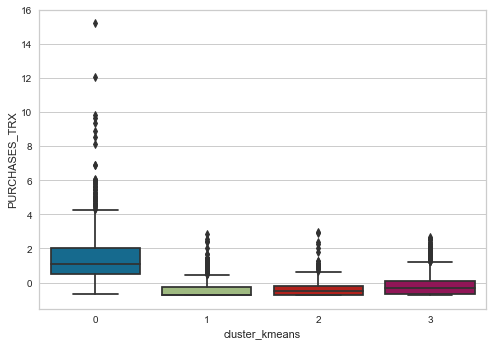

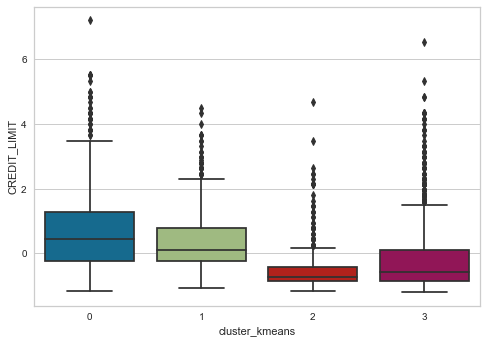

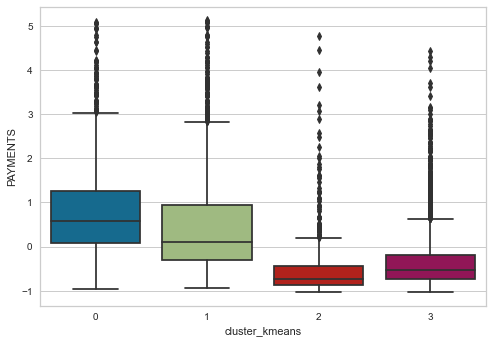

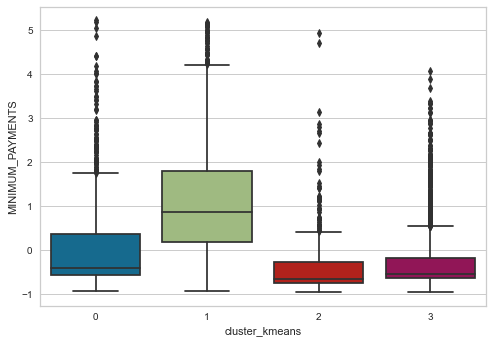

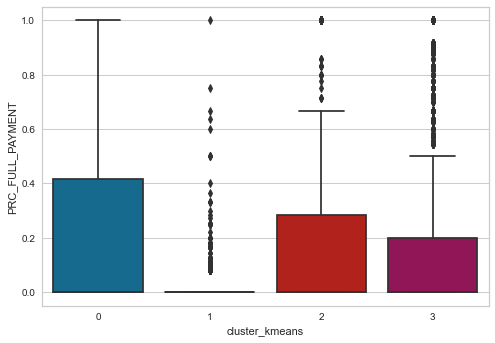

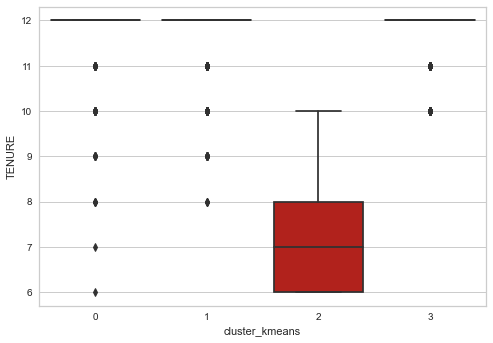

In [149]:
for i in FEATURES:
    sns.boxplot(x='cluster_kmeans', y=i, data=df_norm)
    plt.show()

In [181]:
km = KMeans(6)
df_norm['cluster_kmeans'] = km.fit_predict(df_norm[FEATURES])
df_norm['cluster_kmeans'].value_counts()

2    2712
5    1502
0    1021
3     960
1     437
4     105
Name: cluster_kmeans, dtype: int64

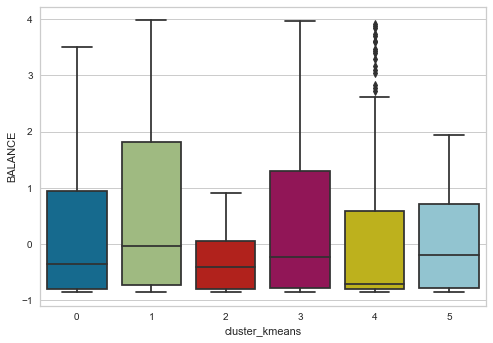

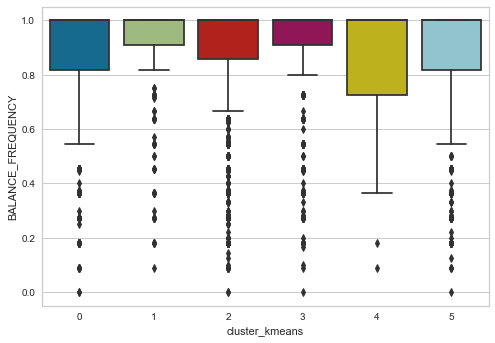

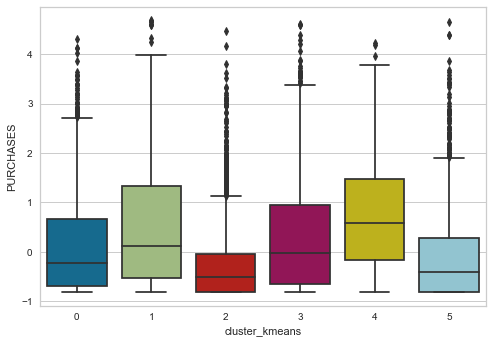

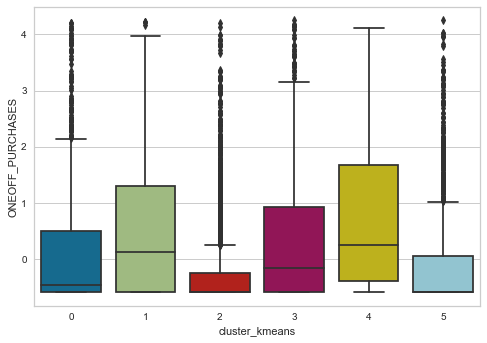

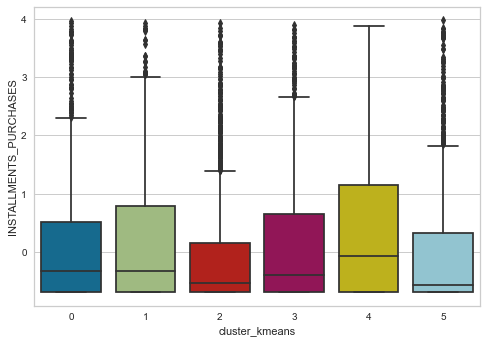

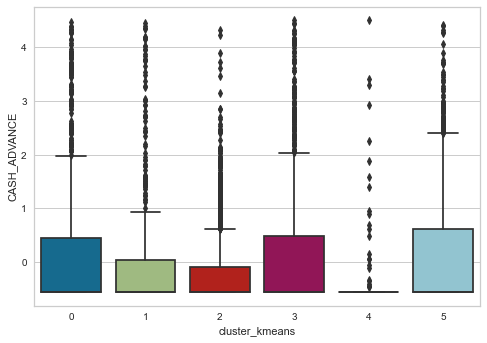

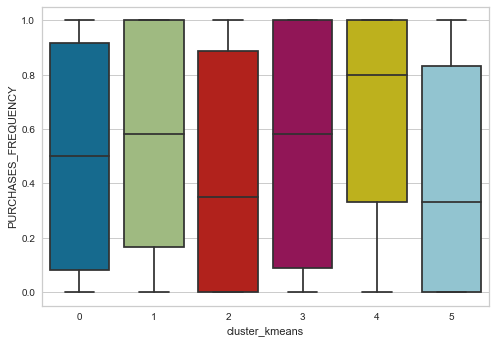

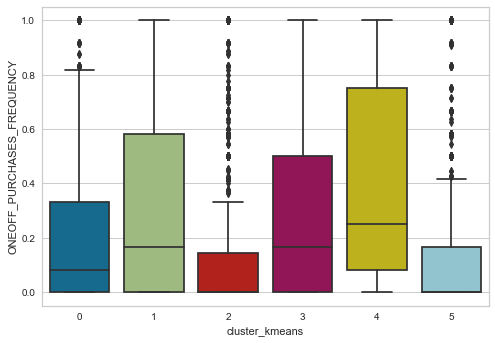

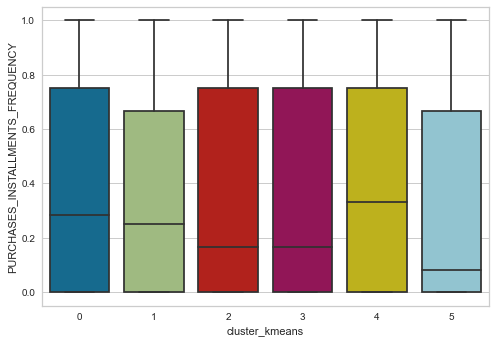

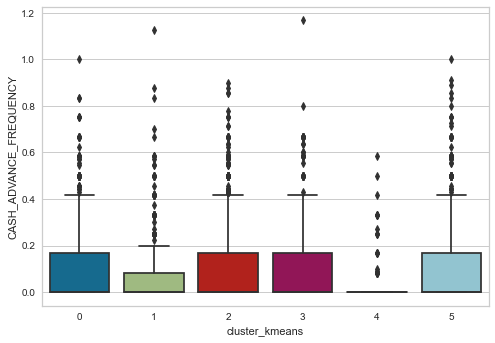

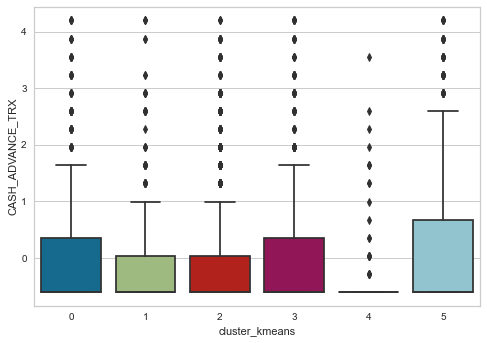

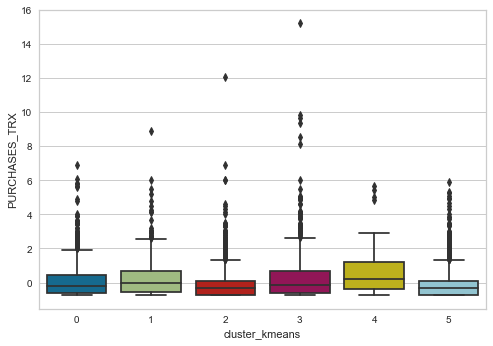

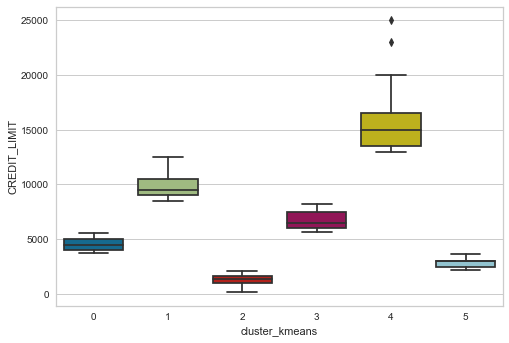

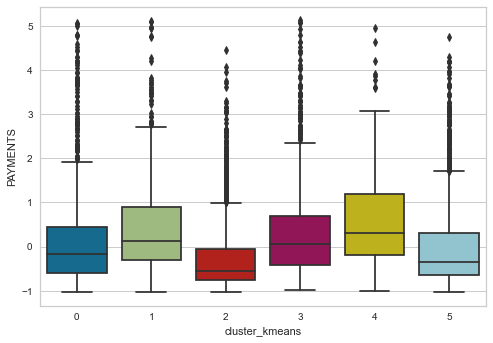

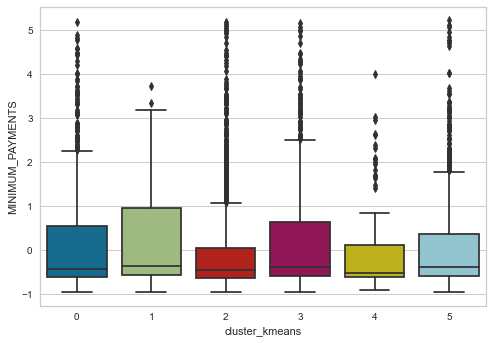

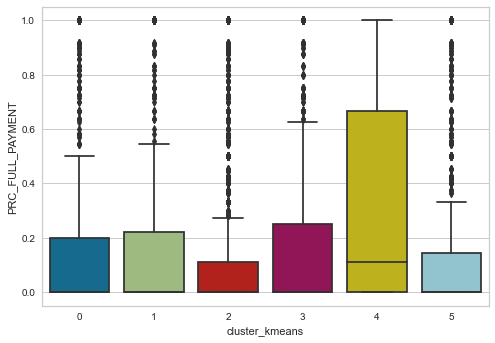

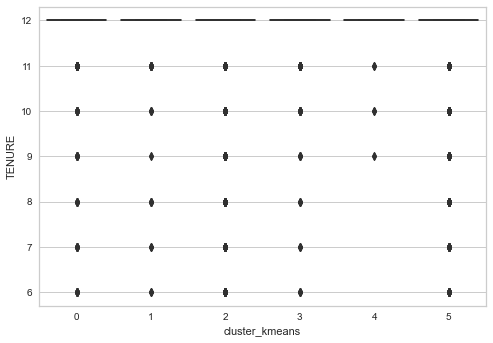

In [182]:
for i in FEATURES:
    sns.boxplot(x='cluster_kmeans', y=i, data=df_norm)
    plt.show()

Apesar do método de silhueta informar a clusterização em 6 grupos diferentes, ao realizar a EDA pelos grupos, fica muito difícil identificar grupos separados. Já com 4 grupos, é possível obter insights mais eficientes, apresentados a seguir. 

- Grupo 0: Este grupo fica com um balanço menor após as compras, mas é o grupo que realiza mais compras com o cartão, possui o maior limite de crédito, realiza compras mais caras, mais compras parceladas, mas não costuma adiantar as contas.  
- Grupo 1: O grupo 1 apresenta um balanço maior da conta após as compras, assim como pagamentos adiantados, maior pagamento mínimo e um crédito relativamente alto, mas um menor número de compras realizadas.  
- Grupo 2, 3: O grupo 2 e 3 são muito semelhantes, com clientes com poucas compras, compras mais baixas e menor limite de crédito. A grande diferença é em relação ao tempo de casa, com o grupo 2 sendo formado por clientes mais novos do que do grupo 3.

## Gaussian Mixture

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


Text(0.5, 0, 'n_components')

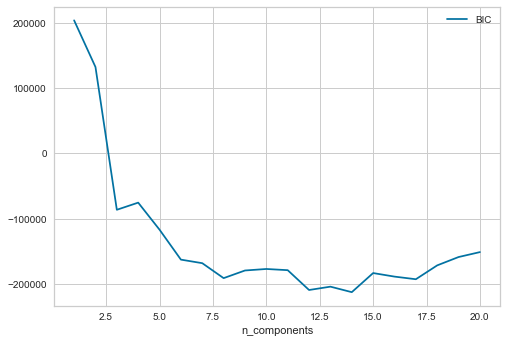

In [183]:
n_components = np.arange(1,21)
models = [GaussianMixture(n, covariance_type='full', 
                         random_state=42).fit(df_norm[FEATURES])
          for n in n_components]

plt.plot(n_components, [m.bic(df_norm[FEATURES]) for m in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [184]:
gmm = GaussianMixture(4).fit(df_norm[FEATURES])
labels_gaussian_mixture = gmm.predict(df_norm[FEATURES])
df_norm['cluster_gmm'] = labels_gaussian_mixture.astype('str')
df_norm['cluster_gmm'].value_counts()

1    3385
0    1972
3    1094
2     286
Name: cluster_gmm, dtype: int64

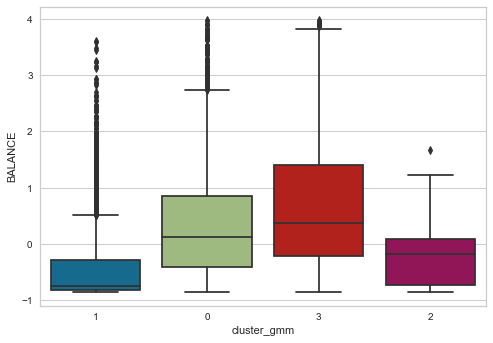

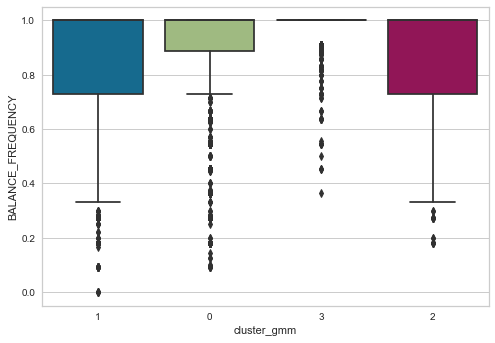

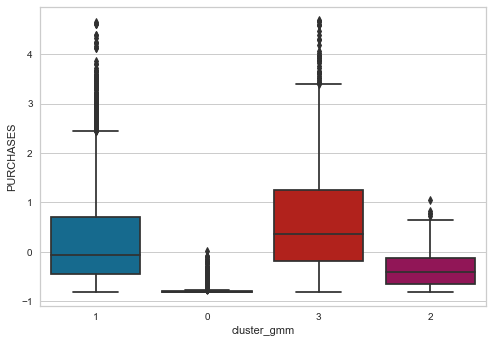

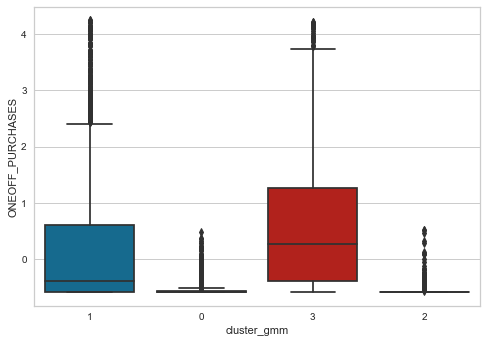

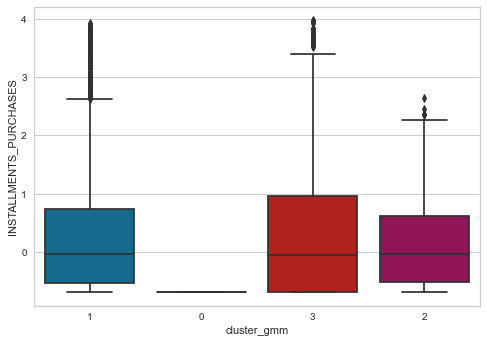

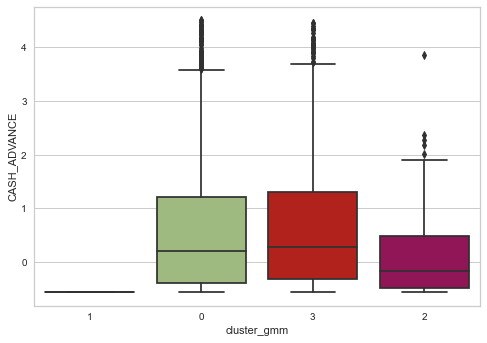

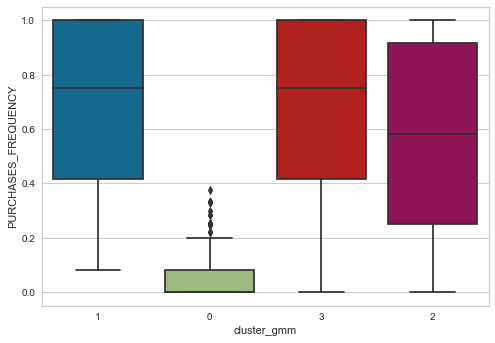

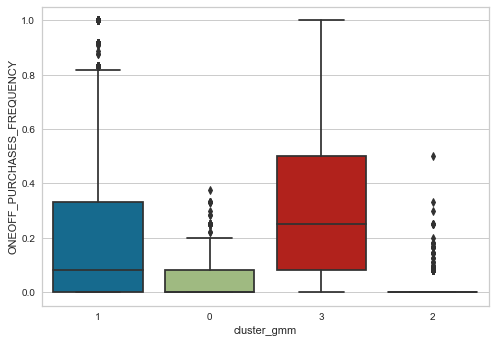

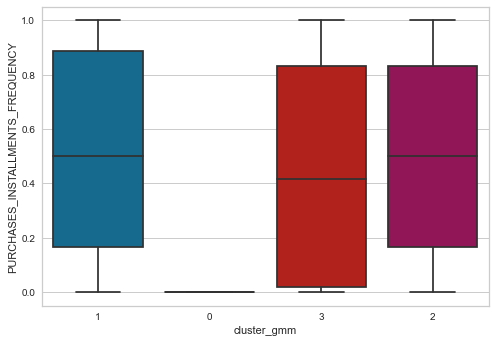

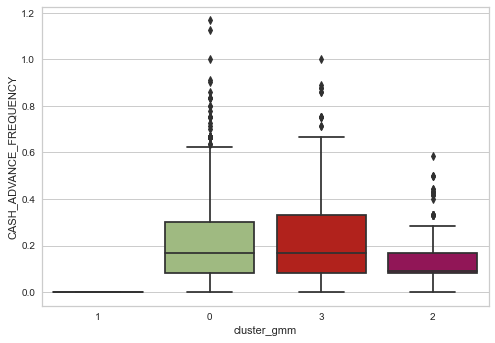

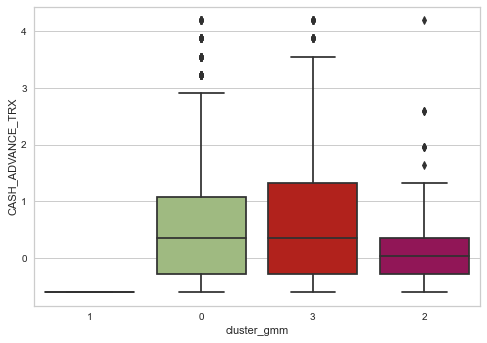

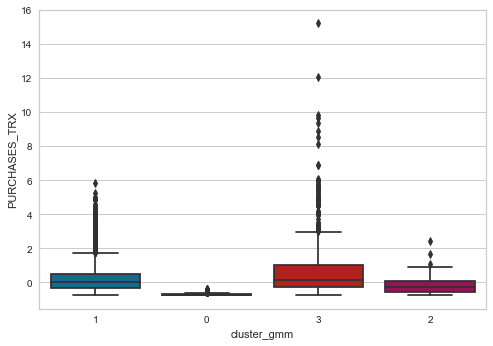

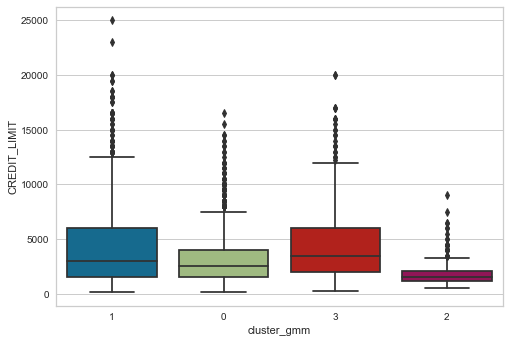

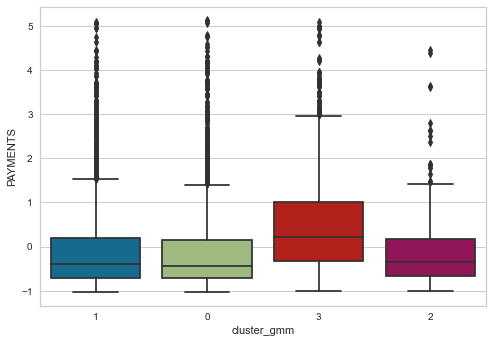

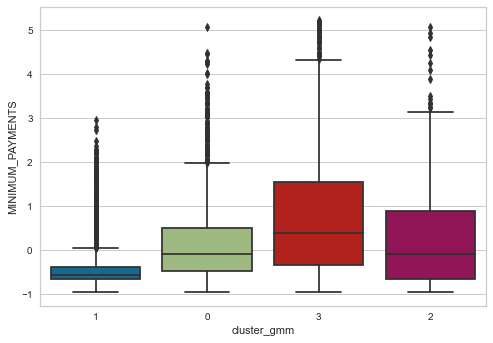

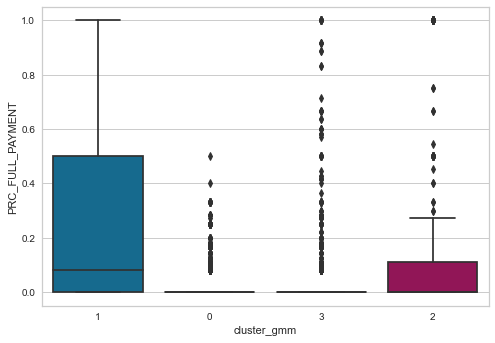

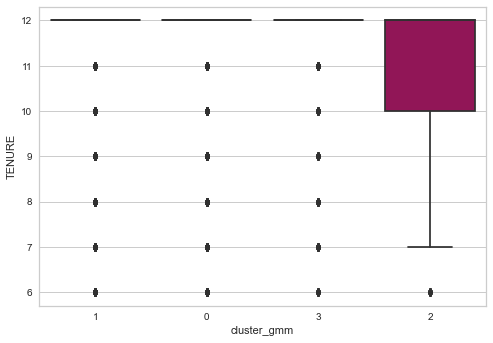

In [185]:
for i in FEATURES:
    sns.boxplot(x='cluster_gmm', y=i, data=df_norm)
    plt.show()

Para os clusters formados pelo modelo de Gaussian Mixture, foi observadao insights muito parecidos com o cluster de KMeans, com o grupo 3 sendo semelhante ao grupo 1 obtido pelo KMeans, o grupo 2 é semelhante ao próprio grupo 2 do KMeans, com clientes mais recentes, mas sem a existência de um grupo muito semelhante, sendo discutido com mais detalhes a seguir.  
- Grupo 0: O grupo 0 possui um bom balanço após as compras, tem atualizações frequêntes no balanço, mas com pouquíssimas compras no crédito, apesar de ter um bom limite.  
- Grupo 1: Este grupo possui um baixo balanço  financeiro em conta, mas apresenta uma frequência de compra elevada, mas de valores mais baixos, além de não adiantar pagamentos. Estes clientes possui um bom limite de crédito, apesar de um menor pagamento mínimo e menor frequência de pagamento.  
- Grupo 2: É um grupo formado por clientes mais recentes, também com um limite de crédito mais baixo. Não realiza muitas compras no crédito, ainda mais compras mais caras. Porém, costuma realizar pagamentos adiantados e em dia.  
- Grupo 3: São os clientes com o maior balanço em conta, com compras frequêntes, de maior valor, pagamentos adiantados e com maior limite de crédito, além de maior frequência de pagamento e maior pagamento mínimo. 

Com base nestas informações, o modelo de Gaussian Mixture conseguiu gerar grupos um pouco mais "separáveis" do que o modelo de KMeans, sendo este o escolhido para a construção do modelo de regressão.

# Exporte do dataframe para a criação do modelo de regressão

## Retirada dos clusteres formados pelo KMeans

In [214]:
df_norm.drop('cluster_kmeans', axis=1, inplace=True)

## Dummificação dos clusteres formados pelo Gaussian Mixture

In [209]:
dummi = pd.get_dummies(df_norm['cluster_gmm']).rename(columns={'0':'cluster_gmm_0', '1':'cluster_gmm_1', 
                                                    '2':'cluster_gmm_2', '3':'cluster_gmm_3'})
df_norm = pd.concat([df_norm, dummi], axis=1)

In [215]:
df_norm.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.819705           0.818182  -0.687480         -0.597929   
2  1.185767           1.000000   0.260167          0.813451   
4 -0.184937           1.000000  -0.798496         -0.568721   
5  0.625762           1.000000   1.043304         -0.597929   
7  0.637058           1.000000  -0.210979         -0.597929   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.440112     -0.559575             0.166667   
2               -0.695456     -0.559575             1.000000   
4               -0.695456     -0.559575             0.083333   
5                2.873147     -0.559575             0.666667   
7                0.472059     -0.559575             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
7                    0.000000                          1.000000   

   CASH_ADVANCE_FREQUENCY  ...  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0                     0.0  ...        1000.0 -0.829268         -0.655746   
2                     0.0  ...        7500.0 -0.400762          0.433366   
4                     0.0  ...        1200.0 -0.343391         -0.420672   
5                     0.0  ...        1800.0  0.392485          4.407691   
7                     0.0  ...        2300.0 -0.342646          0.220688   

   PRC_FULL_PAYMENT  TENURE  cluster_gmm  cluster_gmm_0 cluster_gmm_1  \
0               0.0      12            1              0             1   
2               0.0      12            1              0             1   
4               0.0      12            0              1             0   
5               0.0      12            3              0             0   
7               0.0      12            1              0             1   

   cluster_gmm_2  cluster_gmm_3  
0              0              0  
2              0              0  
4              0              0  
5              0              1  
7              0              0  

[5 rows x 22 columns]

In [217]:
df_norm.drop('cluster_gmm', axis=1, inplace=True)

## Exporte do csv para o modelo de regressão

In [218]:
df_norm.to_csv('df_regressao.csv', encoding='utf-8', index=False)

In [220]:
df_exportado = pd.read_csv('df_regressao.csv')
df_exportado.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.819705           0.818182  -0.687480         -0.597929   
1  1.185767           1.000000   0.260167          0.813451   
2 -0.184937           1.000000  -0.798496         -0.568721   
3  0.625762           1.000000   1.043304         -0.597929   
4  0.637058           1.000000  -0.210979         -0.597929   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.440112     -0.559575             0.166667   
1               -0.695456     -0.559575             1.000000   
2               -0.695456     -0.559575             0.083333   
3                2.873147     -0.559575             0.666667   
4                0.472059     -0.559575             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    1.000000                          0.000000   
2                    0.083333                          0.000000   
3                    0.000000                          0.583333   
4                    0.000000                          1.000000   

   CASH_ADVANCE_FREQUENCY  ...  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0                     0.0  ...      -0.607648        1000.0 -0.829268   
1                     0.0  ...       0.080223        7500.0 -0.400762   
2                     0.0  ...      -0.676435        1200.0 -0.343391   
3                     0.0  ...      -0.194926        1800.0  0.392485   
4                     0.0  ...       0.080223        2300.0 -0.342646   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster_gmm_0  cluster_gmm_1  \
0         -0.655746               0.0      12              0              1   
1          0.433366               0.0      12              0              1   
2         -0.420672               0.0      12              1              0   
3          4.407691               0.0      12              0              0   
4          0.220688               0.0      12              0              1   

   cluster_gmm_2  cluster_gmm_3  
0              0              0  
1              0              0  
2              0              0  
3              0              1  
4              0              0  

[5 rows x 21 columns]